

---


 **Classification in Machine Learning**
 Analysis of Machine Learning Models for Gamma-Ray Detection
 ***Independant Reasearch Project***


---



> Syed Bilal Afzal

> Submited to : Jicai Pan

>2023-05-13

*Code was learned and researched through online course materials and textbooks (Standford University Notes, youtube, codeacademy, public github pages, Classification ML Testbooks)*

Mainly:

1. https://web.stanford.edu/class/cs102/lectureslides/ClassificationSlides.pdf


2. http://compneurosci.com/wiki/images/4/4f/Support_Vector_Machines_%28SVM%29.pdf
 


3.  https://www.youtube.com/watch?v=i_LwzRVP7bg&list=PLjBPyabXmb_7-Zv832r2xC9oKBzygrStb&index=30&t=9352s




```

















```






## Sections


---


```


1.	Abstract

2.	Introduction

3.	Setting up the dataset

4.	Train, Validation, tests datasets

5.	Classification Report Explanation

        a. Precision
        b. Recall
        c. F1 Score

6.	Knn
        a. The Math Behind KNN
        b. Under the Hood of KNN

7.	Naïve Bayes

        a. Naïve Bayes : Mathematical Explination

8.	SVM

        a. Support Vector Machine : Genral Overview

9.	Logistic Regression
        
        a. Logistic Regression: Mathematical Explanation
        b. Deeper look at Gradient Descent

10.	Logistic Regression vs Neural Network- Comparative analysis

        a. Logistic Regression: A Linear Approach
        b. Neural Networks: The Non-Linear Powerhouse

11.	Neural Network

        a. Optimizer
        b. Loss Function
        c. Metrics
        d. Understanding the Nueral Network Model

12.	EDITED Neural Network

        a. Differences (V1 & V2)

13.	Discussion

14.	Conclusion 


```













```







































```





---


# **Abstract**


---



### **English:**




The purpose of this paper is to conduct a comprehensive exploration of various machine learning models, focusing on their application to high-energy gamma-ray detection. The central objective lies in understanding how these models learn and predict outcomes, through a detailed examination of their underlying mathematics and mechanics. We've used five models, namely k-Nearest Neighbors (kNN), Naive Bayes, Logistic Regression, Support Vector Machines (SVM), and Neural Networks(2x), presented in a systematically organized Jupyter Notebook. The study employs a hands-on approach, coupling each model's theory with practical code walkthroughs. The results highlight the strengths and weaknesses of each model, providing insights into their suitability for gamma-ray detection. Ultimately, the research underscores the importance of appropriate model selection and parameter tuning in achieving superior predictive performance.


### **French:**





Ce document explore l'utilisation de divers modèles d'apprentissage automatique pour la détection des rayons gamma. À travers un Notebook Jupyter, nous présentons cinq modèles - k Nearest Neighbors (kNN), Naive Bayes, Régression Logistique, Support Vector Machines (SVM) et Neural Networks. Chaque modèle est expliqué en détail avec du code commenté.Chaque modèle est évalué sur la base de ses performances, mettant en lumière ses points forts et faibles pour la détection des rayons gamma.

De plus, notre Notebook comprend des annotations pour chaque extrait de code, rendant ce travail accessible à ceux qui débutent dans le domaine. Ce document vise à donner une compréhension claire de la manière dont ces modèles fonctionnent, apprennent et font des prédictions.




---


# **Introduction**

---




This study aims to understand and compare the performance of various machine learning models in the context of gamma-ray detection. The hypothesis is that different models, with their unique strengths, will exhibit diverse performance metrics when applied to the same problem, underscoring the necessity for a robust model selection process.

Key concepts explored include classification problems, model evaluation metrics, data preprocessing, and model training and testing. Each model's section elucidates its mathematical underpinnings and the effects of varying parameters. Essential equations and concepts, such as Bayes' theorem for Naive Bayes, the distance calculation in kNN, the decision boundary for SVM, the cost function and gradient descent for Logistic Regression, and the architecture and backpropagation in Neural Networks, are thoroughly discussed.

The data analyzed consists of high-energy gamma-ray detection events, with specific features being used to predict the occurrence of such an event. The model's performance is evaluated using metrics such as accuracy, precision, recall, and F1-score, and the results are discussed in detail. The paper concludes with a comparison of the models and insights into their suitability for gamma-ray detection.

Moreover, the Notebook includes a rich repository of side-by-side annotations for each code snippet, providing an accessible learning tool for those new to the field. A significant feature of this research paper is the comprehensive explanations that extend beyond the technical details to provide an intuitive understanding of how these models operate, learn, and make predictions.



---


# **Setting Up The DataSet**


---



Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope]. Irvine, CA: University of California, School of Information and Computer Science.


**This dataset mimics the detection of high-energy light particles (gamma rays) by a specific type of ground-based telescope. The telescope captures patterns produced by these gamma rays interacting with the atmosphere. These patterns, referred to as shower images, help differentiate between gamma rays from space (signal) and disturbances from cosmic rays (background). After processing, these patterns form a unique shape (an elongated cluster), which can be analyzed in several ways (such as their asymmetry or total size) to improve the differentiation process.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to stadarsdise all the values i the colums for easy comparison
from imblearn.over_sampling import RandomOverSampler #to over sample the hadrons

**The following is the Attribute Information (i.e. the columns[parameters] for each row[instance] in our dataset)**:

     1.  fLength:  continuous  # major axis of ellipse [mm]
     2.  fWidth:   continuous  # minor axis of ellipse [mm] 
     3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
     4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
     5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
     6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
     7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
     8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
     9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

In [ ]:
cols = ["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('magic04.data', names=cols)   #reads some csv(comma seperated values) file that you pass in and turns it into a pandas dataframe object
# and assigns column names based off of the cols list. 

# Just so you can familiarise yourself with the language for this study and of Machine Learning:
# The first 10 columns(feature matrix) can be considered as the attributes/input parameters
#  for every instance(row) and the last column is the output or class(target vector) of each instance. 

df.head()#head() gives the first 5 rows

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique()  #shows the unique values, in this case there's only gammas or hadrons

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == 'g').astype(int) #converts entire column to 1 if equal(true) , 0 if false

In [ ]:
df["class"].unique()

array([1, 0])

In [ ]:
 df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

The following code generates histogram plots for each feature column in a dataframe, separated by the class labels "gamma" and "hadron". It loops over each column in the dataframe, excluding the last one which is likely the target class. For each column, it generates a histogram of values for instances where the class is "gamma", colored blue and labeled accordingly. Similarly, it generates a histogram for instances where the class is "hadron", colored red and labeled as such. Both histograms have their opacity set to 0.7 and are represented as a probability density. This means that the area under each histogram will sum to 1, indicating the relative frequency of each feature value for that class. The title of the plot is set to the column name, and labels for the x and y axes are set. The labels are displayed via a legend, and the plot is then shown. This process repeats for each feature column in the dataframe, generating separate plots that allow for visual comparison of feature distributions for the two classes.


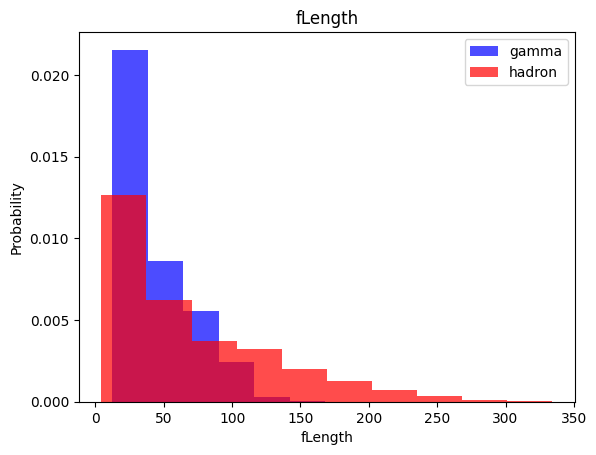

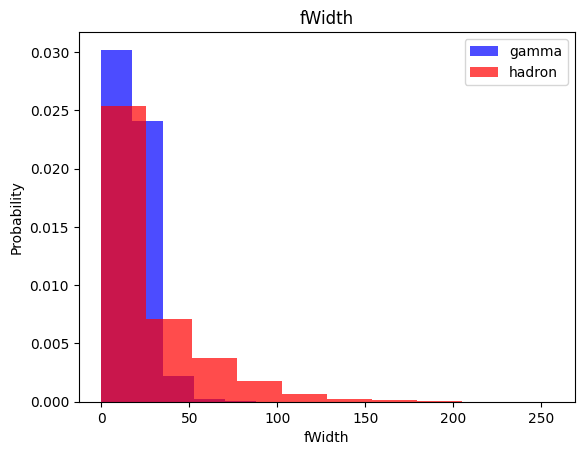

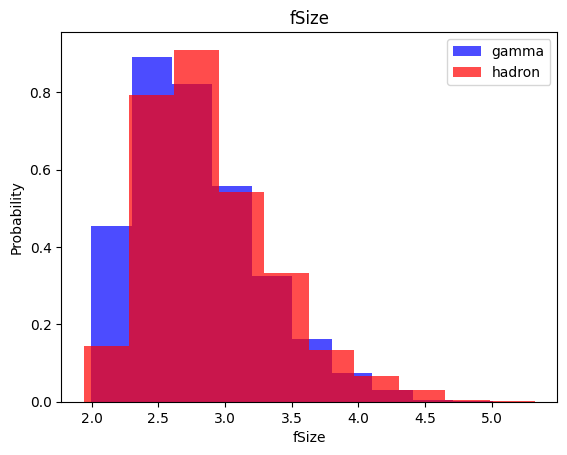

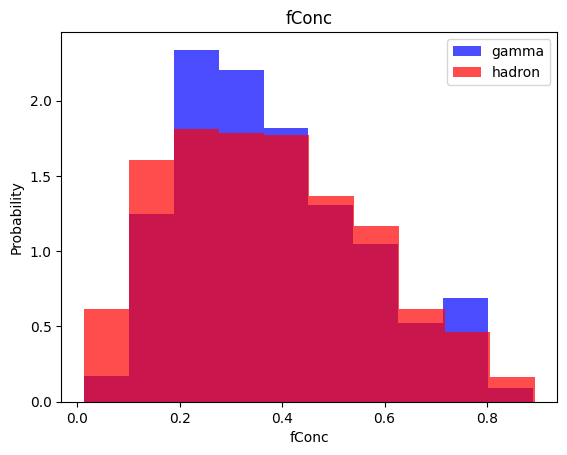

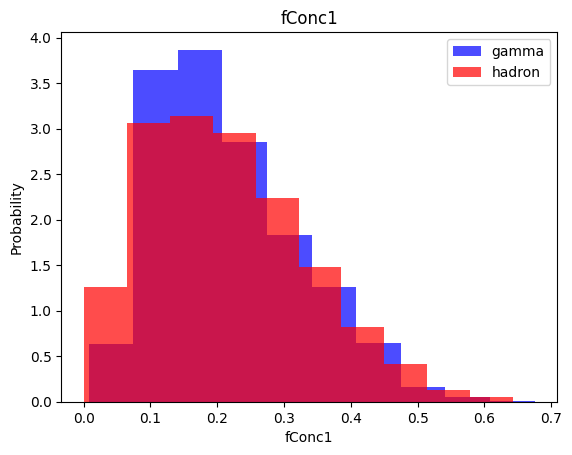

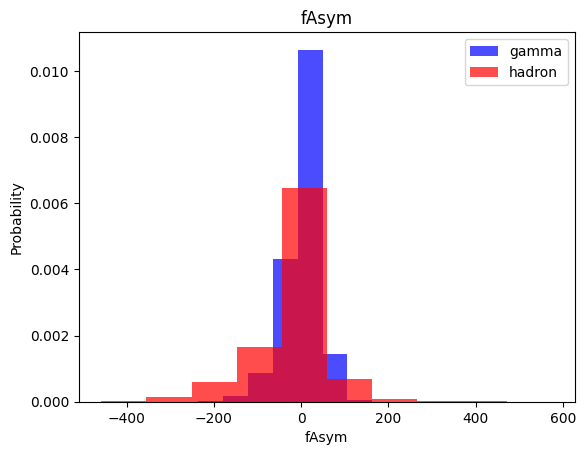

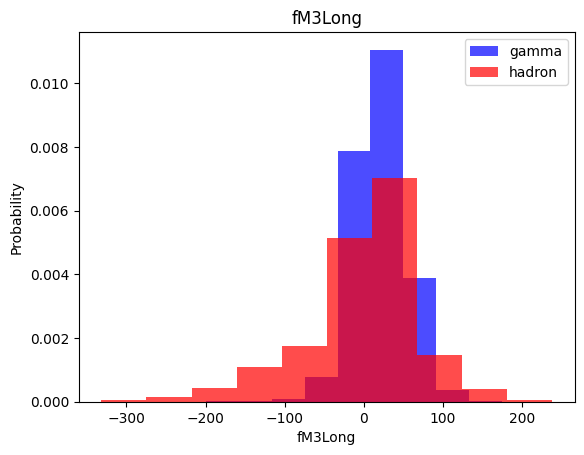

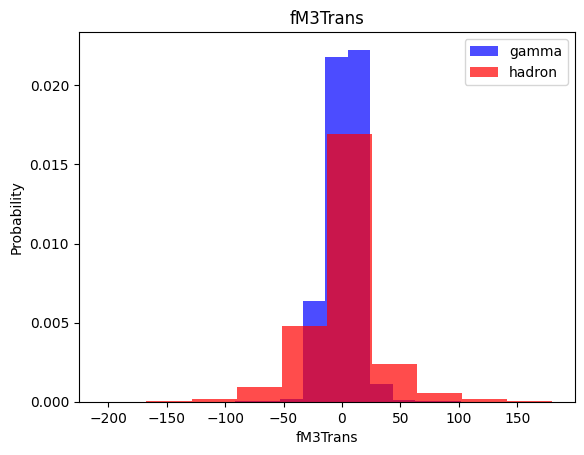

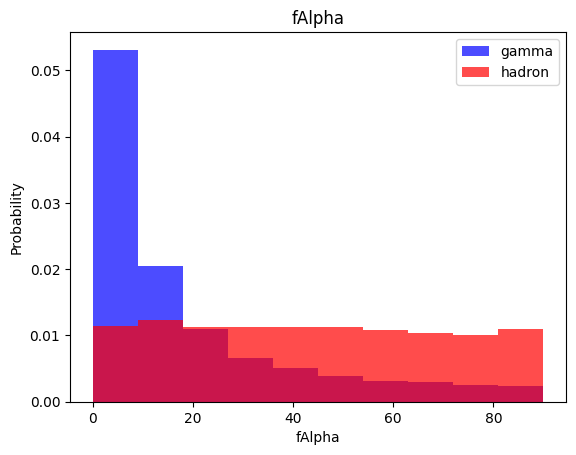

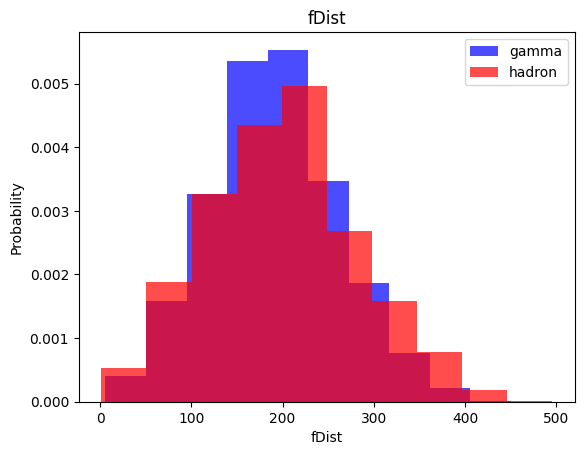

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) #
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7,  density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()



---


# **Train, Validation, test datasets**


---



In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] ) 
#60% of dataset is to train, 20% validation, remainder is for testing

After inspecting data from the Table, you can see how the values of some colums are on completly different scales (Example: flength & fconc). 
 Different orders of magnitude can some times affect results during training, so we should scale them 

We will also standardise them. Standardization involves transforming the values in a column so that they have a mean of 0 and a standard deviation of 1.  In this process, each value in the column is subtracted by the column's mean and then divided by the column's standard deviation.


```
Here's an example to illustrate this:

Original data: [2, 4, 6, 8, 10]

Mean: (2 + 4 + 6 + 8 + 10) / 5 = 6

Standard Deviation: sqrt(((2-6)^2 + (4-6)^2 + (6-6)^2 + (8-6)^2 + (10-6)^2) / 5) ≈ 2.83

Standardized data: [(-4/2.83), (-2/2.83), (0/2.83), (2/2.83), (4/2.83)] ≈ [-1.41, -0.71, 0, 0.71, 1.41]

As you can see, after standardizing the data, we have both positive and negative values, and the mean (average) of the standardized data is 0.
```



This scaling technique helps compare features measured in different units, improves the performance of many machine learning algorithms, as they might be biased towards the majority class otherwise,
and helps in faster convergence during the optimization process. 

"Convergence refers to the stable point found at the end of a sequence of solutions via an iterative optimization algorithm" (quoted from Machine Learning Mastery)

In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values #set x to be all but the last column of which ever dataframe is passed in the function
  y =  dataframe[dataframe.columns[-1]].values #set y to be the last column

  scaler = StandardScaler() # create an instance of the StandardScaler class, which will be used to standardize our data. 

  # The fit_transform method combines the fit and transform operations into one step.
  x = scaler.fit_transform(x) 
  #The fit method computes the mean and standard deviation of each feature in the input data x.
  #These values will be used for scaling (i.e., transforming) the data.
  #The transform method scales the input data x by subtracting the mean and dividing by the standard deviation calculated during the fit step. 

  if oversample: 
    ros = RandomOverSampler() #creates an instance of the RandomOverSampler class. 
    # This class is used to oversample the minority class in an imbalanced dataset by randomly replicating instances of the minority class.
   
    x,y = ros.fit_resample(x,y) 
    #This method oversamples the minority class in the dataset by duplicating instances of the minority class. 
    # The method returns the oversampled feature matrix(10 columns) and target vector(last column), which are then assigned back to the x and y variables.



  data = np.hstack((x,np.reshape(y, (-1,1)))) #take 2 arrays and horizontally staxck them together (side by side)
# reshape the array , y,  to 1D

  return data, x, y

#   when you call ros.fit_resample(x,y), it looks at the class labels in y, identifies the minority class, 
# and creates new instances in x and y for that class. After this operation,
#  the number of instances of class 0 and class 1 in y should be the same, and x will have the corresponding 
# feature values for these new instances.

# In the context of machine learning, "class" usually refers to the possible values of the target variable (1 or 0), 
# not the labels of the columns. The labels of the columns are often referred to as "features" or "attributes".
 


This function, `scale_dataset`, takes as input a dataframe and an optional boolean parameter for oversampling. It first separates the dataframe into feature values (`x`) and class labels (`y`). Then, it uses the `StandardScaler` class to standardize the feature values, which involves calculating the mean and standard deviation of each feature, subtracting the mean from each feature value, and dividing the result by the standard deviation. If the `oversample` parameter is set to `True`, the function uses the `RandomOverSampler` class to oversample the minority class in the dataset, creating new instances of the minority class to balance the dataset. The oversampled feature matrix and target vector are then reassigned back to `x` and `y`. Finally, the function combines `x` and `y` back into a single array using the `np.hstack` function, which horizontally stacks the arrays side by side, and returns this combined data along with `x` and `y` separately. The result is a standardized and potentially oversampled dataset ready for machine learning models.

In [ ]:
 df, train, valid, test #Display the new datasets 
#  DF:    [19020 rows x 11 columns] 
#  TRAIN: [11412 rows x 11 columns] 
#  VALID: [3804 rows x 11 columns] 
#  TEST : [3804 rows x 11 columns] 

(        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
 0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
 1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
 2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
 3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
 4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
 ...         ...       ...     ...     ...     ...       ...       ...   
 19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
 19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
 19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
 19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
 19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   
 
        fM3Trans   fAlpha     fDist  class  
 0       -8.2027  40.0920   81.8828      1  
 1       -9.9574   6

In [ ]:
# Here we print the count of the classes(gamma or hadron), in the train dataset where the Class column, of the train dataset, is equal to 1(and 0)
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0])) #hadron

7325
4087


We see that we have a different amount of values (7325 gammas and 4087 hadrons) . This can be an issue durring training, to avoid that we will OVERSAMPLE the values of the smaller amount

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False) #oversample=False,dont want to oversample these ones, want all of the validation and 
# testing data to remain unseen
test, x_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
len(x_train) #number of rows(instances) in the feauture matrix X of the train data set has now changed

14650

In [ ]:
sum(y_train ==0) #The count of hadrons has changed from 4087 to 7325 due to oversampling teh minority class

7325

In [ ]:
sum(y_train==1) #the count of gammas stayed the same since it was the majority class

7345



```












```





---


# **Classification Report Explanation**


---

After running each model we will be calling a function called `classification_report` to analyze the predictions and preformance of each model. Familliarise yourself with the following vocabulary:

### **Precision**:
 Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In other words, it's the proportion of positive identifications (model predicted class 1) that were actually correct. A model that produces no false positives has a precision of 1.0. Mathematically, precision is represented as TP/(TP+FP) where TP is the number of true positives and FP is the number of false positives.



### **Recall** (Sensitivity or True Positive Rate): 
 Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It's the proportion of actual positives that were identified correctly. A model that produces no false negatives has a recall of 1.0. Mathematically, recall is represented as TP/(TP+FN) where TP is the number of true positives and FN is the number of false negatives.

### **The difference between precision and recall comes down to the type of errors a model makes:**

Precision is all about the accuracy of positive predictions. It calculates what proportion of positive identifications were actually correct. In other words, if the model predicts that some instances are positive, how many of these are actually positive? High precision means that when the model predicts a positive class, it's very likely to be correct.

For example, if your model is designed to predict whether an email is spam or not, high precision means that if an email is flagged as spam by your model, it's very likely that it truly is spam.

Recall, on the other hand, calculates how many of the actual positives our model capture through labeling it as positive (True Positive). It is the ability of a model to find all the relevant cases within a dataset. High recall means that the model correctly identifies a large proportion of the positive class.

Continuing with the spam email example, high recall means that your model correctly identifies most of the spam emails and doesn't miss many.

Let's take an example:

Let's say we have 100 emails, out of which 20 are spam and the rest 80 are not.
Our model identified 30 emails as spam.
Out of these 30 emails, 15 were actually spam and 15 were not (but our model misclassified them as spam).
So, in this case:

Precision would be 15/30 = 0.5. This means, when our model says an email is spam, it's correct 50% of the time.
But let's calculate Recall. Out of 20 actual spam emails, our model correctly identified 15. So, Recall would be 15/20 = 0.75. This means, our model was able to catch 75% of the actual spam emails.
So, Precision and Recall are related to the type of errors our model makes - either it's classifying negative instances as positive (affecting precision), or it's missing out on positive instances (affecting recall). The balance between precision and recall is often a trade-off based on your business requirements.

### **F1-Score:**
 The F1 score is the harmonic mean of precision and recall. It tries to balance these two values. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It's a good metric to consider if you need to seek a balance between precision and recall and there is an uneven class distribution. Mathematically, it is represented as 2*(Recall * Precision) / (Recall + Precision).

## **Summary**

All these metrics provide a different perspective on the performance of models and are used together to understand its strengths and weaknesses. High precision means that the model correctly identifies a high proportion of the positive class, but at the cost of potentially missing some actual positives (low recall). Conversely, high recall means the model identifies most of the positive class correctly, but may include more of the negative class (lower precision). The F1-score is useful when you want a balance between these two metrics.





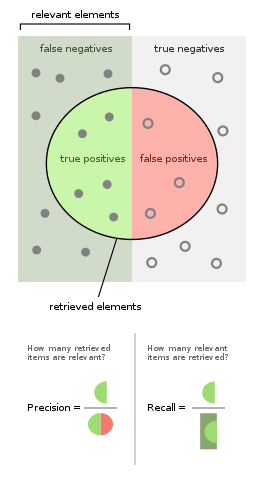






---


# **kNN**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #This line is importing the KNeighborsClassifier class from the sklearn.neighbors module.
#  The KNeighborsClassifier is a machine learning model used for classification tasks.
#  It classifies instances based on their similarity to instances from the training set.
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=42) #This line is creating an instance of the KNeighborsClassifier class 
# with the parameter n_neighbors set to 42. This means that the model will classify instances based on the class of their
#  single nearest neighbor in the training set.

knn_model.fit(x_train, y_train) #This line trains the model on the training data. 
# The fit() method takes two arguments: the feature matrix x_train and the target vector y_train.

KNeighborsClassifier(n_neighbors=42)

In [ ]:
y_pred = knn_model.predict(x_test) #This line uses the trained model to predict the class labels for the test data.
#  The predict() method takes one argument: the feature matrix x_test.

In [ ]:
y_pred #models prediciton

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
y_test #actual true data from the dataframe

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred)) #This line prints a classification report that shows the performance of the model on the test data. 
# The classification_report() function takes two arguments: the true class labels and the predicted class labels.

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1319
           1       0.86      0.89      0.87      2485

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804








## **K-Nearest-Neighbor Explanation**



The K-Nearest Neighbors (KNN) algorithm is a type of instance-based learning algorithm, meaning it doesn't explicitly learn a model. Rather, it stores the training instances which are subsequently utilized as "knowledge" during the prediction phase.





### **The Math Behind KNN**




Given a new, unseen instance, the KNN algorithm finds the 'k' instances from the training set which are nearest to the new instance (hence the name 'k-Nearest Neighbors'). 'Nearest' is typically defined using a distance metric such as Euclidean distance, Manhattan distance, or Minkowski distance.

In our code, the Euclidean distance metric is used by default (although this can be changed). The Euclidean distance between two points 'a' and 'b' in a 2-D space is calculated as:
.

```
sqrt((a1-b1)^2 + (a2-b2)^2)

where a1, a2 are the coordinates of point 'a' and b1, b2 are the coordinates of point 'b'. This concept extends to higher dimensions as well
```



### **Under the Hood of KNN**





The KNN model is initialized with the parameter 'n_neighbors' set to 42. This means that the model will classify instances based on the class of their 42 nearest neighbors in the training set.

The model is then trained on the training data using the 'fit()' method. Here, 'fitting' the model means storing the training data in a way that's efficient for calculating the nearest neighbors. There are different ways to do this, including using a data structure like a KD Tree or a Ball Tree(we won't be diving into these).

After the model is trained, it's used to predict the class labels for the test data using the 'predict()' method. For each instance in the test data, the model finds its 42 nearest neighbors in the training data. The predicted class label for the test instance is then the most common class label among these neighbors.

Finally, the performance of the model on the test data is evaluated using a classification report, which provides measures such as precision, recall, and f1-score for each class.

In summary, the KNN algorithm is a simple yet powerful machine learning algorithm that can be very effective for tasks where the decision boundary is very irregular. However, it can also be computationally expensive for large datasets, as it needs to compute the distance from a test instance to each instance in the training set.



---


# **Naive Bayes**


---




In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1319
           1       0.74      0.89      0.81      2485

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804








## Naive Baynes: Mathematical Explanation




Naive Bayes is a classification technique based on applying Bayes' theorem with the "naive" assumption of independence between every pair of features. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

The general equation for Bayes' theorem is:



```
P(A|B) = P(B|A) * P(A) / P(B)
```


In the context of our classification problem, we can interpret this as:


```
P(y|x₁, x₂, ..., xₙ) = P(x₁, x₂, ..., xₙ|y) * P(y) / P(x₁, x₂, ..., xₙ)
```





In this scenario, y represents a class (either gamma or hadron), and x₁, x₂, ..., xₙ represent the feature values.

1. P(y|x₁, x₂, ..., xₙ): This is the posterior probability of class y given the predictors x₁ to xₙ. We're trying to calculate this - the probability that the class is 'gamma' or 'hadron', given the specific feature values we have.

2. P(x₁, x₂, ..., xₙ|y): This is the likelihood, which is the probability of observing the specific feature values given that the class is 'gamma' or 'hadron'. In other words, if we know something is a gamma, what's the probability it would have these specific features? This is calculated based on the training data.

3. P(y): This is the prior probability of the class, or the initial degree of belief in y. This is the probability of 'gamma' or 'hadron' without any additional information, based on its frequency in the training data.

4. P(x₁, x₂, ..., xₙ): This is the prior probability of the predictors, or the total probability of observing these specific feature values, irrespective of whether it's 'gamma' or 'hadron'. This is usually a constant if we're just comparing the relative probabilities of 'gamma' and 'hadron', so in practice we don't calculate this directly.

In the Naive Bayes algorithm, the denominator (prior probability of predictors) remains constant for all classes. Therefore, the class of a new instance can be predicted as the y that maximizes the numerator, which is the product of the likelihood and the prior. 

This means that we pick the class ('gamma' or 'hadron') that has the highest probability given the feature values, assuming that these features are independent (the 'naive' assumption). Even though this assumption might not be completely accurate, the Naive Bayes algorithm often works well in practice and provides a simple and efficient way to predict classes based on their feature values.


:

:

:

Given a data point with n features (x₁, x₂, ..., xₙ), the Naive Bayes algorithm computes the posterior probability for each class y as follows:

```
P(y|x₁, x₂, ..., xₙ) = [ P(x₁, x₂, ..., xₙ|y) * P(y) ] / P(x₁, x₂, ..., xₙ)
```

Because of the "naive" assumption of feature independence, the term P(x₁, x₂, ..., xₙ|y) can be simplified to the product of individual conditional probabilities:

```
P(x₁, x₂, ..., xₙ|y) = P(x₁|y) * P(x₂|y) * ... * P(xₙ|y)
```
Using the product notation, this can be more concisely written as:

```
P(x₁, x₂, ..., xₙ|y) = Π P(xᵢ|y) for i = 1 to n
```
This greatly simplifies the computation, turning it into a series of multiplications of probabilities that can be easily computed from the data.

Finally, to predict the class of a new data point, the Naive Bayes algorithm selects the class y that maximizes the posterior probability P(y|x₁, x₂, ..., xₙ). Using the argmax notation, this can be written as:
```
y = argmax [ Π P(xᵢ|y) * P(y) ] for y in classes
```
This equation highlights the basic operation of the Naive Bayes classifier: it multiplies probabilities (estimated from the data) for each feature of a data point, given each possible class, and then selects the class that gives the highest result.








---


# **SVM**


---



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1319
           1       0.89      0.90      0.90      2485

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804






## Support Vector Machine Explination





The SVC() function creates an instance of the SVM classifier. The fit method is where the SVM model is trained. During this training phase, the SVM finds the hyperplane that best separates the classes in the training data. It's here where the SVM solves the optimization problem, behind the scenes, to find the best hyperplane. The SVM's objective is to find the optimal decision boundary that maximizes the margin, defined as the distance between the boundary and the closest instances from each class. This mechanism allows the SVM to generalize well to unseen data, making it a robust choice for classifying these particles. The decision boundary would be visualized as a curve or a line in a 2D space, or a hyperplane in higher dimensions, which is determined based on the complexity of the data and the kernel chosen. A kernal is a function that is used to map the original dataset (linear/nonlinear ) into a higher dimensional space with a view to making it possible to perform the linear separation between the classes. For our project, the success of the classification task and the subsequent scientific interpretations hinge on how well the SVM constructs this decision boundary.

The predict method is used to make predictions on the test data. For each point in the test set, it applies the decision function using the weight vector and bias term determined during training, and the sign of the result determines the predicted class.






---


# **Logistic Regression**


---




In [ ]:
from sklearn.linear_model import LogisticRegression # imports the LogisticRegression class from Scikit-Learn's linear_model module.
#  This class implements logistic regression.

In [ ]:
lg_model = LogisticRegression() #instance of the LogisticRegression class is created. This instance, lg_model, is the actual logistic regression model.
#  By default, the model uses the log loss as its cost function and a variant of Gradient Descent called Limited-memory BFGS (L-BFGS) as 
# its optimization algorithm.

lg_model = lg_model.fit(x_train, y_train) #The fit method trains the model using the training data. Specifically, it uses the L-BFGS algorithm 
# to find the set of parameters (βi's) that minimize the cost function. Under the hood, L-BFGS is iteratively adjusting the parameters 
# in the direction of steepest decrease of the cost function

In [ ]:
y_pred = lg_model.predict(x_test) #After training, the predict method is used to make predictions on the test data.
#  It applies the trained model, with its learned parameters, to the feature values in x_test.
#  It calculates the log-odds 'z' for each test example, applies the sigmoid function to these log-odds to get a probability, 
# and then outputs a class prediction based on a threshold (by default, 0.5).

print(classification_report(y_test, y_pred)) # function to compare the model's predictions (y_pred) to the actual class labels (y_test)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1319
           1       0.84      0.82      0.83      2485

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804







## Logistic Regression: Mathematical Explanation




Logistic Regression is a statistical model used for binary classification problems. Unlike linear regression which outputs continuous values, logistic regression transforms its output using the sigmoid or logistic function to return a probability value, which can be mapped to two or more discrete classes.





The mathematical formula for logistic regression can be stated as follows:


```
z = β0 + β1*X1 + β2*X2 + ... + βn*Xn


```
where βi are the parameters of the model and Xn represents the features of our input data. The value 'z' is also known as the log-odds or logit.

The sigmoid function is defined as:


```
σ(z) = 1 / (1 + e^-z)
```


where e is the base of the natural logarithm (approximately equal to 2.71828), and 'z' is the input to the function. The output of this function is a number between 0 and 1, which can be interpreted as the probability of the positive class.

So the final formula for logistic regression becomes:



```
p = σ(z) = 1 / (1 + e^-(β0 + β1*X1 + β2*X2 + ... + βn*Xn))
```


---


If the output probability 'p' is greater than a threshold (commonly 0.5), we predict the positive class; otherwise, we predict the negative class.

Another important property of the sigmoid function is that it is differentiable, which means that we can use gradient-based optimization methods, like Gradient Descent, to find the model parameters (βi) that minimize the cost function (like log loss) for logistic regression.

Training a logistic regression model involves learning the best set of βi parameters that minimizes the discrepancy between the model's predictions and the actual data. This process is facilitated by a cost function, which quantifies this discrepancy. For logistic regression, a common cost function used is the log loss, also known as binary cross-entropy loss.

The log loss cost function is defined as:

```
J(β) = -1/m * Σ [y * log(σ(z)) + (1 - y) * log(1 - σ(z))]
```

where m is the number of training examples. y is the actual class label. σ(z) is the predicted probability of the positive class and  z = Σ βi * xi

This cost function is suitable for logistic regression because it penalizes the model heavily when it confidently makes a wrong prediction.

The process of training involves minimizing this cost function. To do this, the model uses an optimization algorithm, typically Gradient Descent or a variant of it.

Gradient Descent iteratively adjusts the model's parameters (βi) in the direction that reduces the cost function the most. It computes the derivative (gradient) of the cost function with respect to each parameter, which indicates the direction of the steepest increase. To minimize the function, it then adjusts each parameter in the opposite direction of its gradient, by a step proportional to the gradient's magnitude.

This iterative process is mathematically expressed as:


```
βi = βi - α * d/d(βi) J(β)
```


where α is the learning rate, which controls the size of the steps. 
d/d(βi) J(β) is the derivative of the cost function with respect to the parameter βi. In summary, each weight βi in the logistic regression model directly influences the predicted probabilities, and thus the log loss. During training, we iteratively adjust these weights in the direction that minimizes the log loss, based on the derivative of the log loss with respect to each weight.


The model continues to adjust the parameters until it reaches a point where the cost function is minimized, i.e., the gradients are very close to zero. At this point, the model's parameters have been "trained", and the model is ready to make predictions.

**During prediction, the model uses the trained βi parameters to calculate 'z', applies the sigmoid function to squash the result into a probability, and outputs a class prediction based on a threshold (commonly 0.5).**





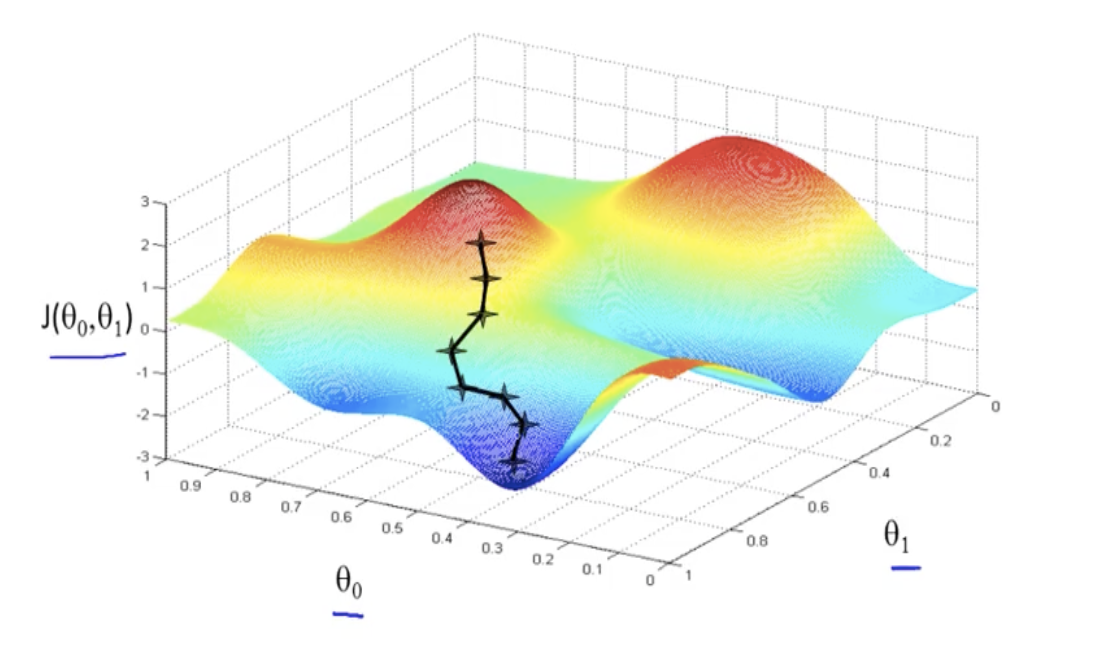





## Deeper look at Gradient Descent
Suppose we have a 3D image of a plane representing a cost function. The x and y axes could represent two parameters, and the z-axis could represent the cost. The plane's surface represents all possible values of the cost function given different parameters.
1. Initialization:  We start at a random point on the plane. This is our initial guess for the parameters.
2. Compute Gradient: We then calculate the gradient at that point. The gradient is a vector that points in the direction of the steepest ascent—opposite to the direction we want to go. The gradient's magnitude (length) also gives the slope's steepness.
3. Update Parameters: We move in the direction of the steepest descent, opposite to the gradient. The step size is determined by the learning rate—a hyperparameter that we set. If the learning rate is too small, the descent can be very slow, but if it's too large, we can overshoot the minimum.
4. Iterate: We repeat steps 2 and 3 until the gradient is close to zero, indicating we've reached a minimum.

**In real-world machine learning problems, cost functions can have many parameters, resulting in a high-dimensional space that we can't visualize. However, the principle remains the same. We're trying to find the parameter values that minimize the cost function, and we're using gradient descent as a method to get there iteratively.**



```





```





---


# **Logistic Regression vs Neural Network** - 

> **Comparative Analysis**




---






In this section, we delve into the fundamental differences between logistic regression and neural networks, focusing on their linearity or non-linearity, and the way they handle input data for prediction. Understanding these characteristics is essential in making informed decisions about which model to use based on the complexity and nature of the problem at hand.






## Logistic Regression: A Linear Approach




Logistic regression is a statistical model used for binary classification problems. Despite the term "regression" in its name, it is primarily used to estimate the probabilities of binary outcomes. The model applies a linear transformation to the input features to predict the output. It multiplies each feature by a corresponding weight (which is learned during training), sums up these products, and then applies a logistic (ex. a sigmoid) function to this sum to produce the output.

The sigmoid function maps the output values to a range between 0 and 1, allowing the linear sum to be interpreted as a probability. However, even though the sigmoid function itself is non-linear, we refer to logistic regression as a linear classifier because it creates a linear decision boundary in the input space. This means that logistic regression's decision boundary is a straight line (or a flat plane in higher dimensions) that separates the classes.





## Neural Networks: The Non-Linear Powerhouse




Neural networks, on the other hand, are considerably more flexible and powerful due to their inherent non-linearity. They involve multiple transformations of the input data, each of which can be non-linear. Specifically, after each layer of weighted sums (similar to the linear transformation in logistic regression), the network applies a non-linear activation function, such as a sigmoid, hyperbolic tangent, or Rectified Linear Unit (ReLU), to the results. This non-linear activation function introduces non-linearity into the model, enabling the network to learn and represent more intricate relationships in the data.

Moreover, neural networks typically comprise multiple layers of these transformations - this is why networks with many layers are referred to as "deep" networks. Each layer applies both a linear and a non-linear transformation, with the output of one layer serving as the input to the next. These multi-layered transformations enable the network to model complex, non-linear relationships between the inputs and the output.

In the case of deep neural networks, these multiple layers provide a mechanism for learning hierarchical representations. Lower layers often learn to represent simple features of the input, while higher layers combine these simple features to represent more complex concepts. This ability to learn hierarchical representations is a key strength of deep learning, and a major reason why neural networks can outperform simpler models, such as logistic regression, on many complex tasks.






## Summary lg vs nn




In summary, while both logistic regression and neural networks utilize a mixture of linear transformations and non-linear functions, the single-layer structure and linear decision boundary of logistic regression make it a linear classifier. In contrast, the multi-layer structure and capacity for complex learning , non-linear decision boundaries make neural networks a non-linear model capable of tackling more challenging tasks.



---


# **Neural Network**


---



In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
# creating a Sequential model. This is a linear stack of layers that you can easily create by passing a list of layer instances 
# to the constructor. The model is stored in the nn_model variable.
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)), #the first layer to the neural network. It's a dense
    # (also known as fully connected) layer with 32 neurons, and it uses the ReLU (Rectified Linear Unit) activation function. 
    # The input_shape=(10,) indicates that each input sample is an array of 10 features. 
    # This argument is only needed for the first layer; Keras automatically infers the shapes of inputs for later layers.
    tf.keras.layers.Dense(32, activation='relu'), # another dense layer with 32 neurons, also with a ReLU activation function.
    tf.keras.layers.Dense(1, activation='sigmoid') 
])# final layer, which is also a dense layer but with only 1 neuron. 
    # This layer uses the sigmoid activation function, which will output a number between 0 and 1 representing the probability 
    # that a given sample belongs to class 1. This setup is common for binary classification problems.

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
#  This line configures the model for training. The Adam optimizer is used with a learning rate of 0.001. 
# The loss function is set to binary cross-entropy, which is suitable for binary classification problems. 
# The model will also keep track of accuracy metric during training.
# Here, the optimizer, loss function, and metrics are specified, which are three essential components for the model to learn from data

In [ ]:
history = nn_model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

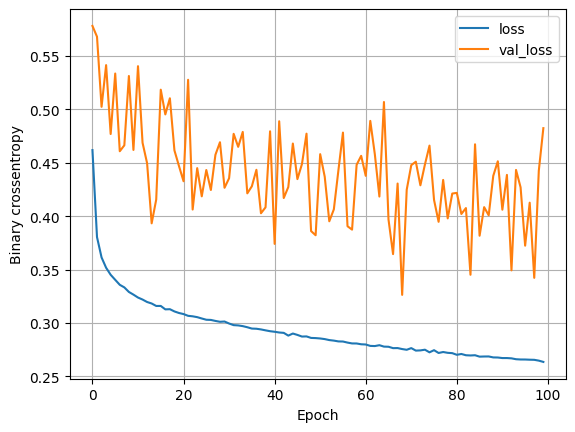

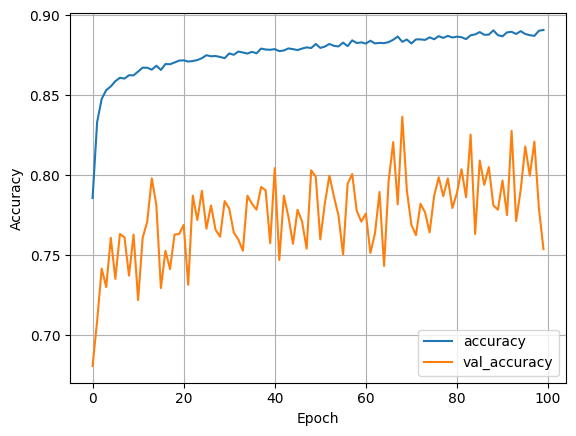

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
y_pred = nn_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1319
           1       0.87      0.95      0.91      2485

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.87      0.87      3804








## Component Explination






### Optimizer
The optimizer is an algorithm or method used to adjust the parameters of your neural network model to minimize the loss function. Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks(stochastic). It computes adaptive learning rates for different parameters. It stores an exponentially decaying average of past squared gradients (v) and keeps an exponentially decaying average of past gradients (m), similar to momentum. Adam is very effective in practice and requires little memory or computation, and is thus commonly used in deep learning applications.

### Loss function
 The loss function measures the inconsistency between predicted values (obtained from the output of the algorithm) and the actual value. In simple terms, it tells us how far our predictions are from the actual values. Binary Cross-Entropy loss is a loss function that is used in binary classification tasks in machine learning and deep learning. It calculates the cross-entropy loss between true labels and predicted labels. It's called binary cross-entropy because it's intended for binary (two-class) classification tasks.

### Metrics
Metrics are functions that are used to evaluate the performance of your machine learning model. The accuracy metric computes the proportion of correct predictions: the number of correct predictions made divided by the total number of predictions. Accuracy is a common metric for classification. While it's straightforward and easy to understand, it's not always the best metric, particularly for imbalanced datasets. In these cases, other metrics like precision, recall, and F1-score can be more informative.

### Summary
In addition to these, there are many other types of optimizers, loss functions, and metrics available in Keras and other machine learning libraries. The choice of which ones to use depends on the specific problem and the nature of the dataset. For example, for multi-class classification tasks, you might use categorical cross-entropy as your loss function. For regression tasks, you might use mean squared error or mean absolute error as your loss function.








## Understanding the Neural Network Model
 (Feedforward Process & Backpropagation)







The Neural Network model operates through a sequence of distinct stages. It commences with a 'feedforward' process, where it predicts outcomes based on the input data. This process initiates from the input layer, progresses through the hidden layer(s), and concludes at the output layer. For our model, the data input is received by the input layer and transmitted to the subsequent hidden layer. In the hidden layer, each data point is multiplied by a weight, added to a bias, and then processed through a Rectified Linear Unit (ReLU) activation function. This operation is reiterated for every layer until it reaches the output layer. The output layer employs a sigmoid activation function, which constrains its output to a range between 0 and 1. This output value can be construed as the model's predicted probability of an input sample belonging to class 1.

Following the feedforward process, the model calculates the loss, a quantitative measure of the discrepancy between its predictions and the actual labels. Our model employs binary cross-entropy as its loss function, an effective choice for binary classification tasks.

The subsequent stage involves 'backpropagation', a process that enables the neural network to learn from its feedforward errors. It computes the gradient of the loss function relative to the weights and biases in the network. The gradient essentially instructs the model on the necessary adjustments to its weights and biases to minimize prediction error.

Backpropagation begins at the output layer and retrogresses through the network, hence the term 'backpropagation'. It employs the chain rule from calculus to calculate these gradients. Following backpropagation, the gradients are utilized to update the weights and biases using the Adam optimizer, a variant of gradient descent. The learning rate determines the step size in the direction that minimizes the loss.

These processes—feedforward, backpropagation, and weight update—are iterated for a specific number of epochs. With each epoch, the model improves its predictive capability and reduces the loss.

In our code, the `fit` function orchestrates these steps. It trains the model for 100 epochs with a batch size of 32(batch size refers to the number of training examples utilized in one iteration.), while allocating 20% of the training data for validation. Subsequently, the `predict` function generates predictions for the test data, and the results are evaluated using a classification report. 




---


# **EDITED Nueral Network**


---




## Differences (Version 1 & Version 2)
In the first code snippet(Section: Nueral Network), we created and trained a simple neural network model with two hidden layers of 32 nodes each, using the Adam optimizer, binary cross-entropy loss, and tracking accuracy as a metric. The model is trained with a fixed learning rate, batch size, and number of epochs.

In contrast, the following code (EDITED Nueral Network) snippet introduces a more sophisticated approach. Firstly, we add a Dropout layer after each Dense layer in the network. The dropout layer randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting (overfitting is when a model fits EXACTLY its own training data).

Moreover, the follwing code includes a hyperparameter tuning loop where we systematically explore different configurations of the number of nodes in the hidden layers, the dropout probability, the learning rate, and the batch size. For each configuration, we train a model, plot the training history, evaluate it on the validation set, and keep track of the model that achieved the lowest validation loss.

In summary, the second code snippet represents a more advanced and rigorous approach to training a neural network, introducing techniques to combat overfitting and systematically tuning hyperparameters to optimize performance.

In [ ]:
# This function is used to visualize the training process. It takes a history object (which is returned by the fit method of a Keras model) 
# as an argument and plots the training loss, validation loss, training accuracy, and validation accuracy over epochs.

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  
  
  plt.show()

In [ ]:
#  function creates and trains a neural network. It takes as arguments the training data (x_train, y_train), 
# the number of nodes in the hidden layers (num_nodes), the dropout probability (dropout_prob), the learning rate (lr),
# the batch size (batch_size), and the number of epochs (epochs). The function returns the trained model and its training history.

def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

    nn_model = tf.keras.Sequential([        
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),

        tf.keras.layers.Dropout(dropout_prob), # during the training process, approximately half of the neurons in the previous layer 
        # will be "turned off" (their contributions will be temporarily removed) during each update. 
        # The idea behind dropout is that by randomly removing different neurons during training, the neural network is
        #  forced to learn redundant representations, and it can't rely too much on any single neuron. 
        # This makes the model more robust and less likely to overfit to the training data.
        
        tf.keras.layers.Dense(num_nodes, activation='relu'), 
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid') 
  ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)
    return nn_model, history

The architecture of the neural network includes:

An input layer of shape (10,1)
Two hidden layers with a specified number of nodes and ReLU activation function, each followed by a Dropout layer.
An output layer with one node and a sigmoid activation function (since it's a binary classification task).
The model is compiled with Adam optimizer, binary cross entropy loss function, and accuracy as the metric. The model is then trained on the training data using the specified batch size and epochs. 20% of the training data is used for validation.

16 nodes, dropout 0, lr 0.01, batch_size 32


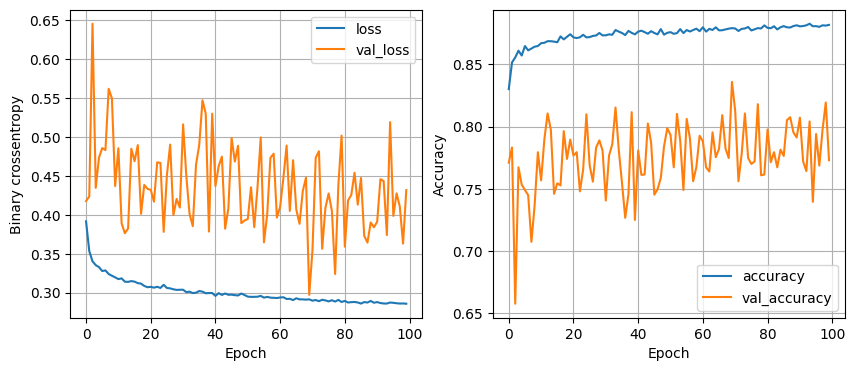

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.01, batch_size 64


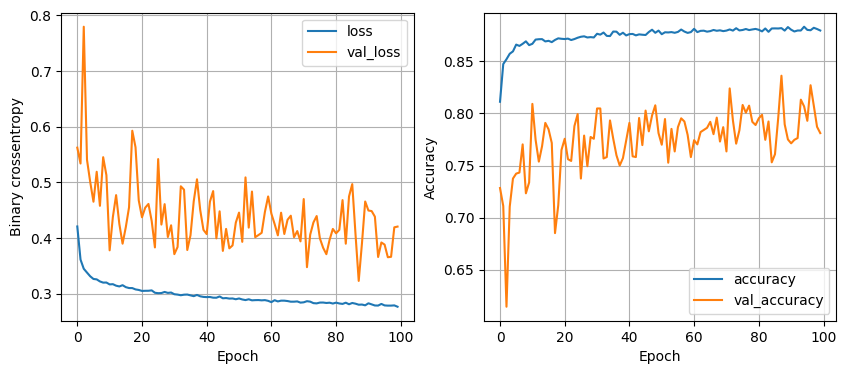

119/119 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.01, batch_size 128


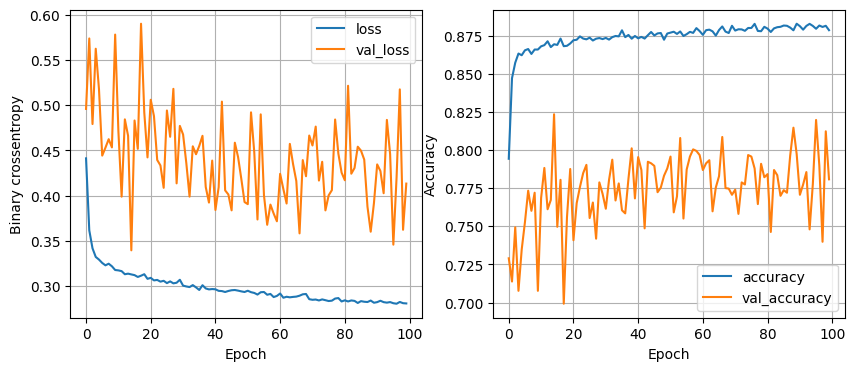

119/119 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch_size 32


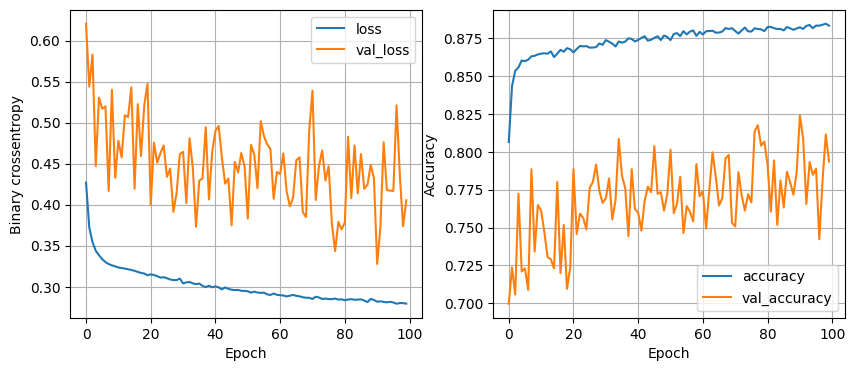

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.005, batch_size 64


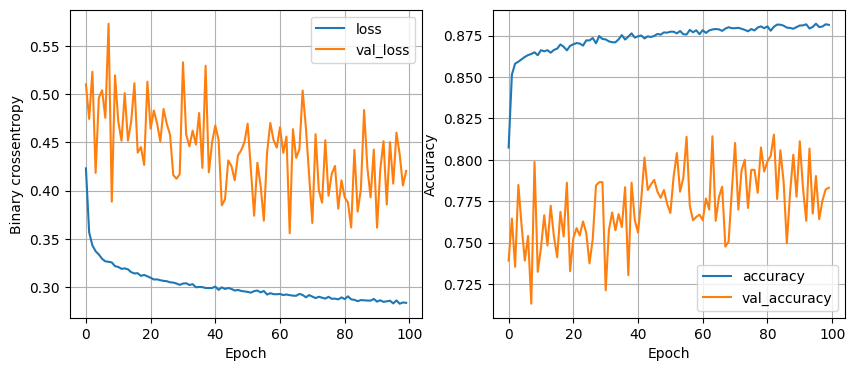

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch_size 128


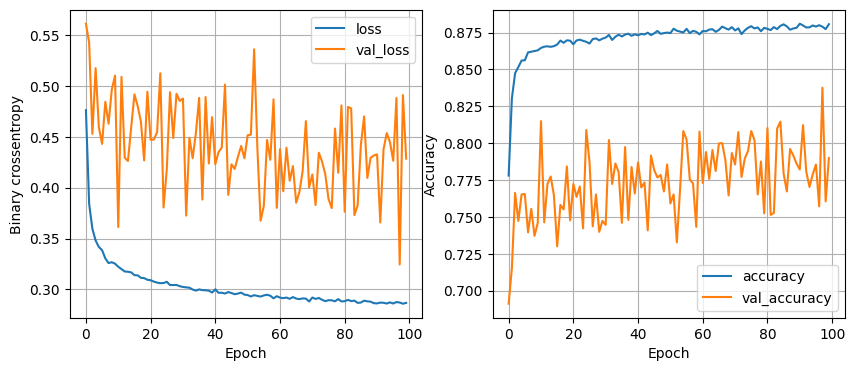

119/119 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch_size 32


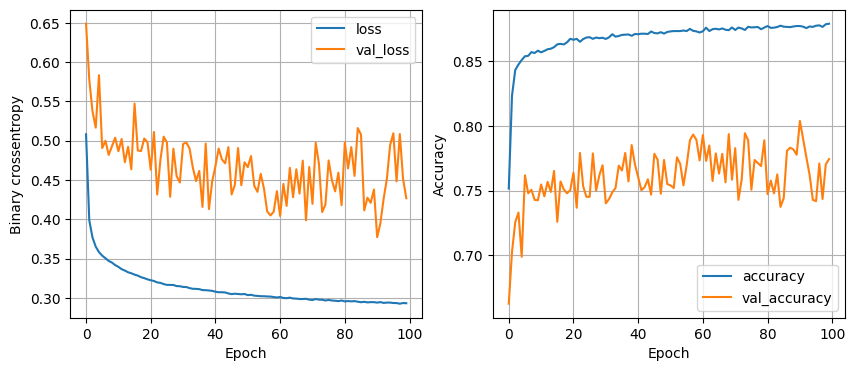

119/119 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.001, batch_size 64


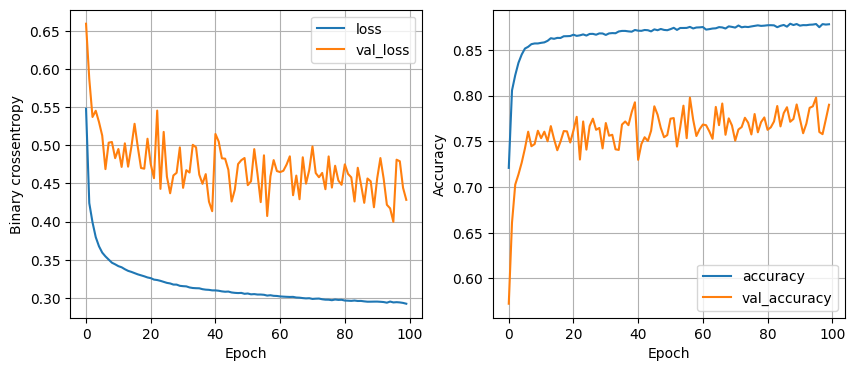

119/119 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8638
16 nodes, dropout 0, lr 0.001, batch_size 128


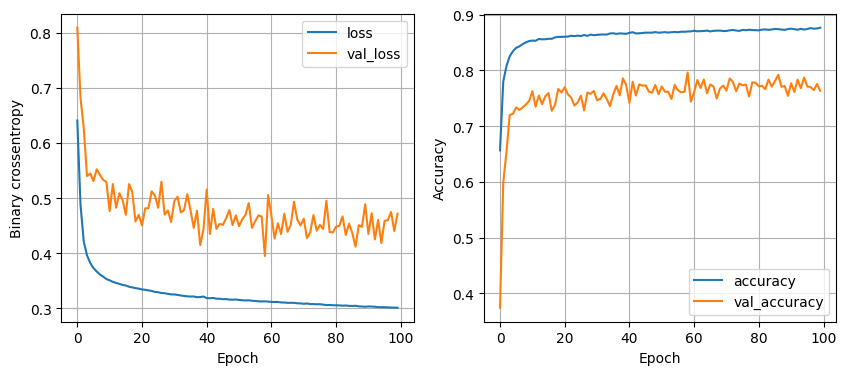

119/119 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.01, batch_size 32


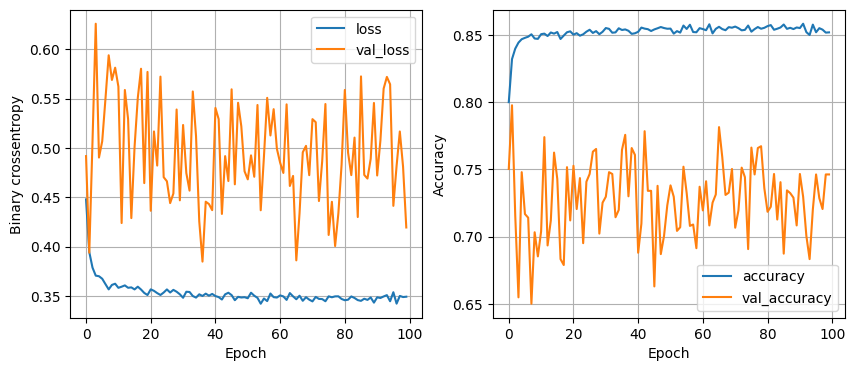

119/119 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.01, batch_size 64


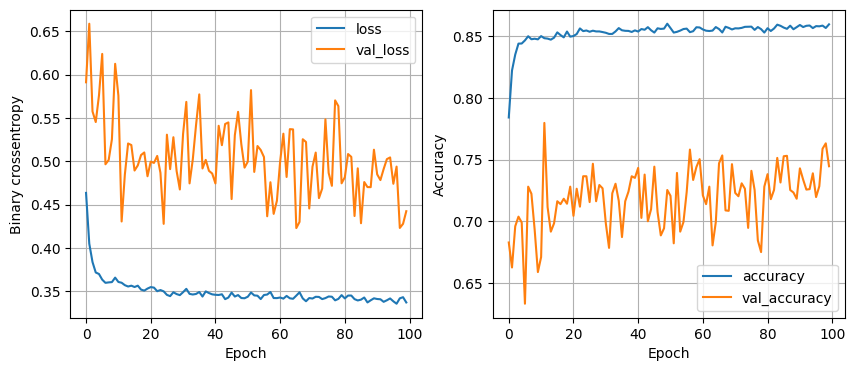

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8720
16 nodes, dropout 0.2, lr 0.01, batch_size 128


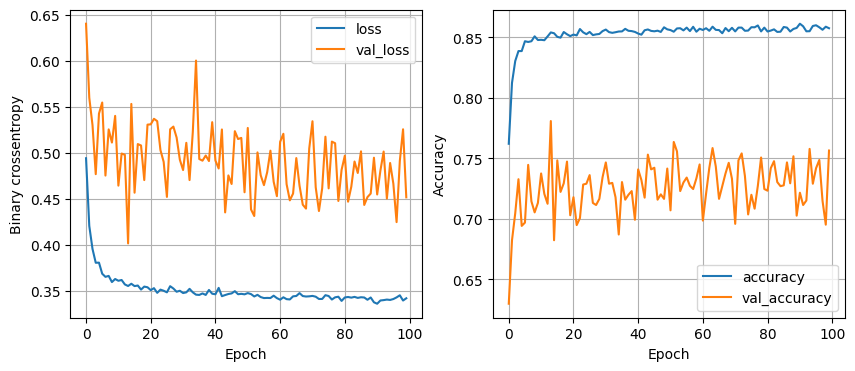

119/119 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch_size 32


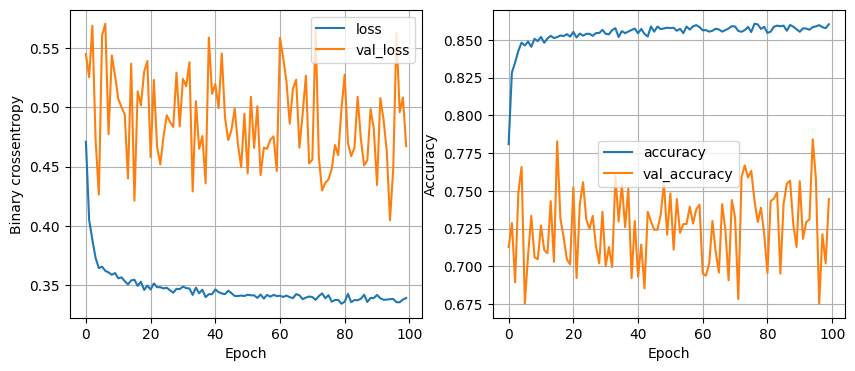

119/119 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch_size 64


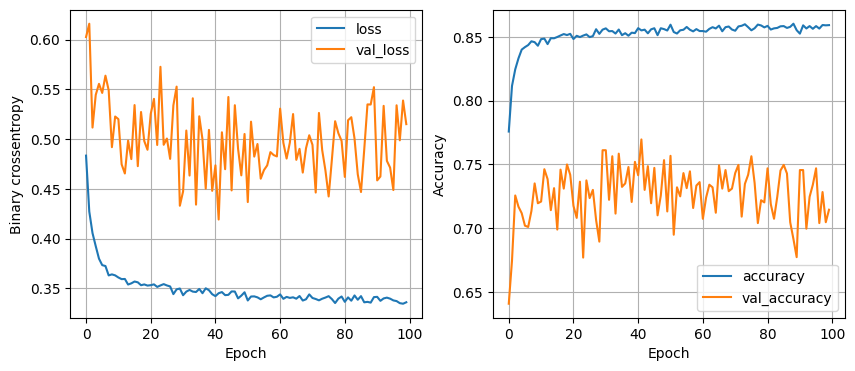

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.005, batch_size 128


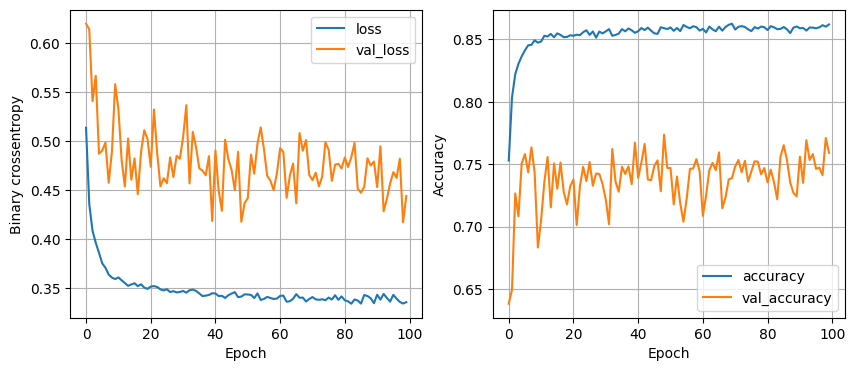

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.001, batch_size 32


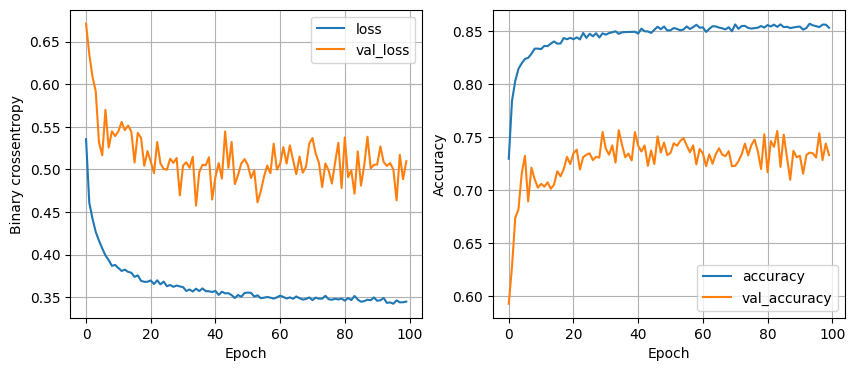

119/119 [==============================] - 0s 3ms/step - loss: 0.3242 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.001, batch_size 64


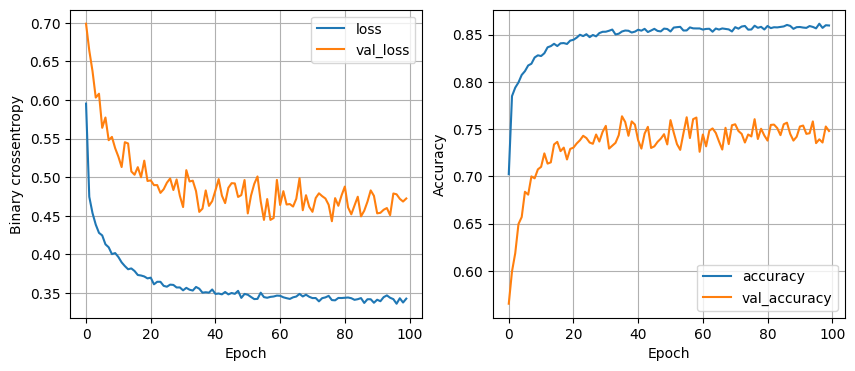

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.001, batch_size 128


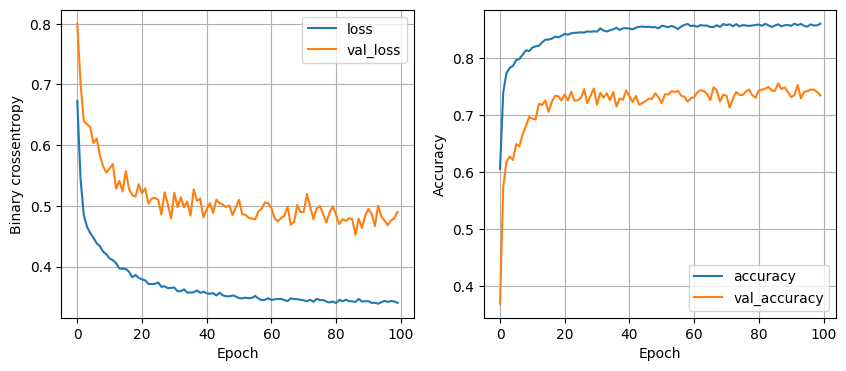

119/119 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.01, batch_size 32


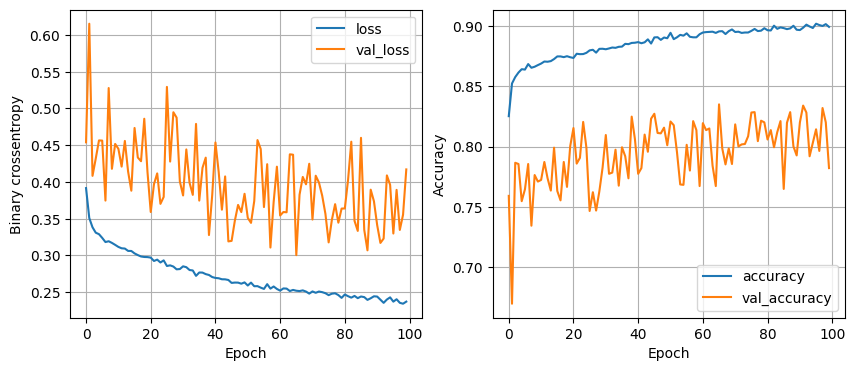

119/119 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch_size 64


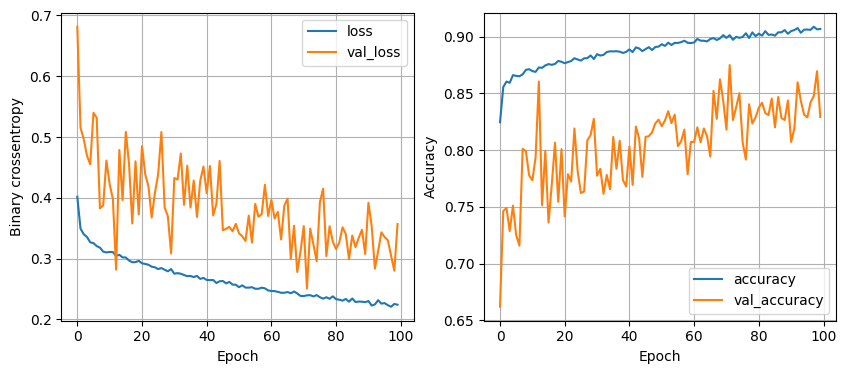

119/119 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch_size 128


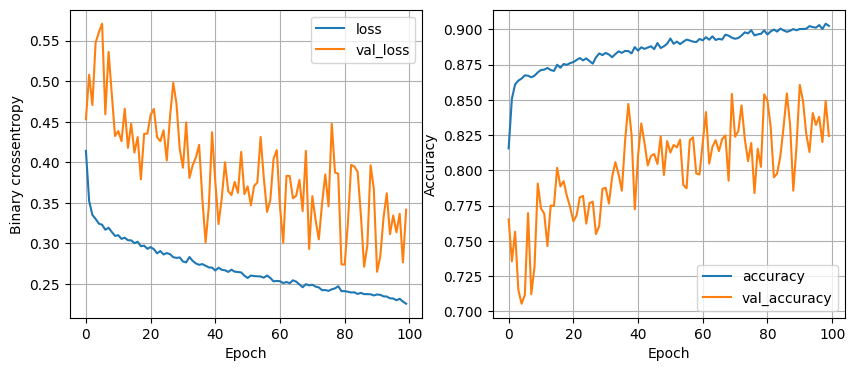

119/119 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.005, batch_size 32


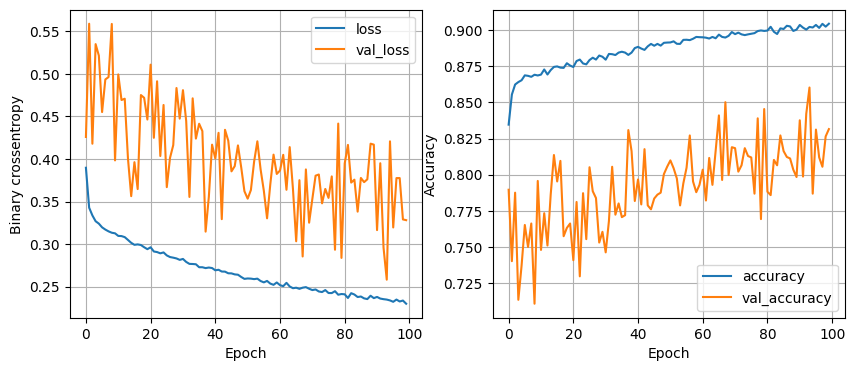

119/119 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch_size 64


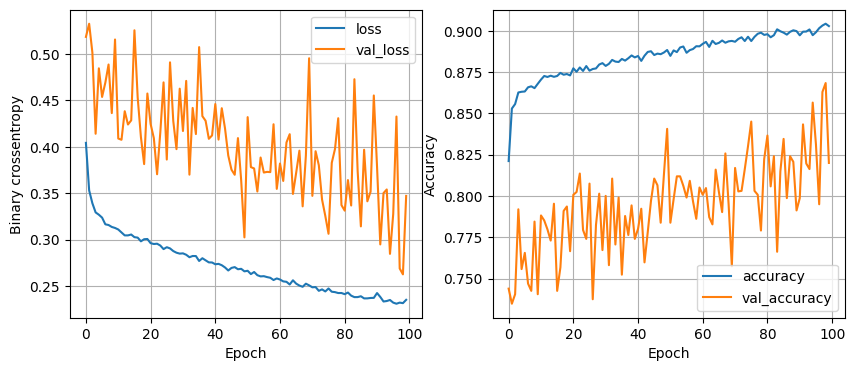

119/119 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.005, batch_size 128


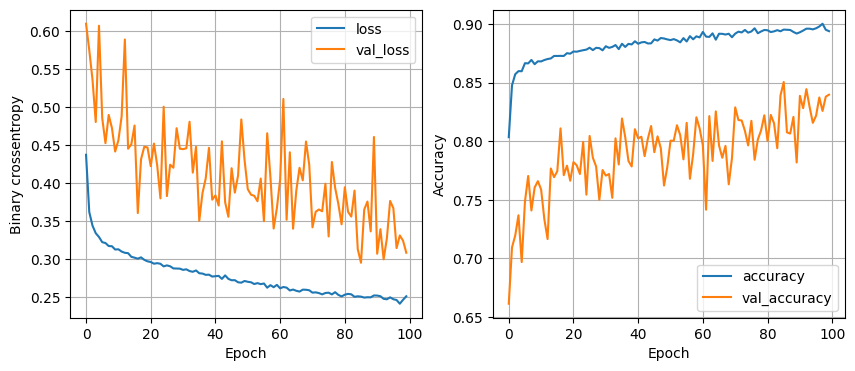

119/119 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.001, batch_size 32


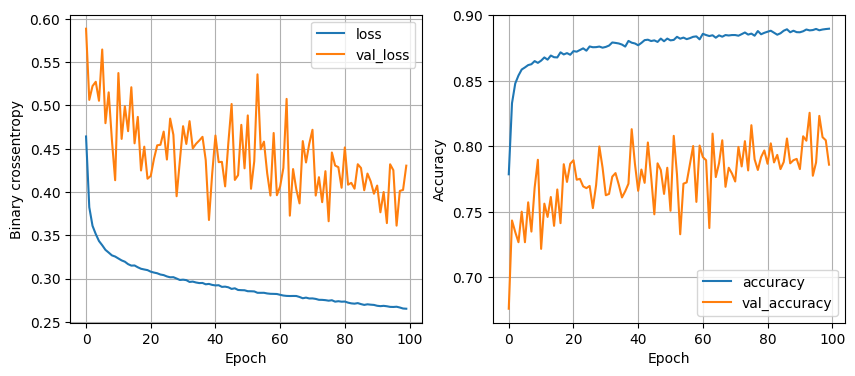

119/119 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.001, batch_size 64


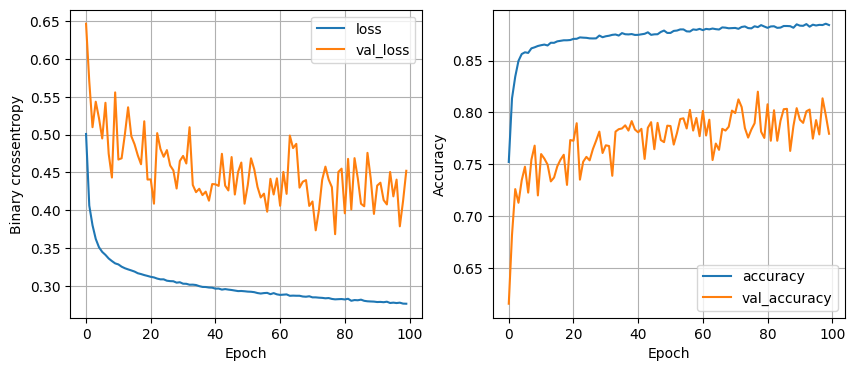

119/119 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.001, batch_size 128


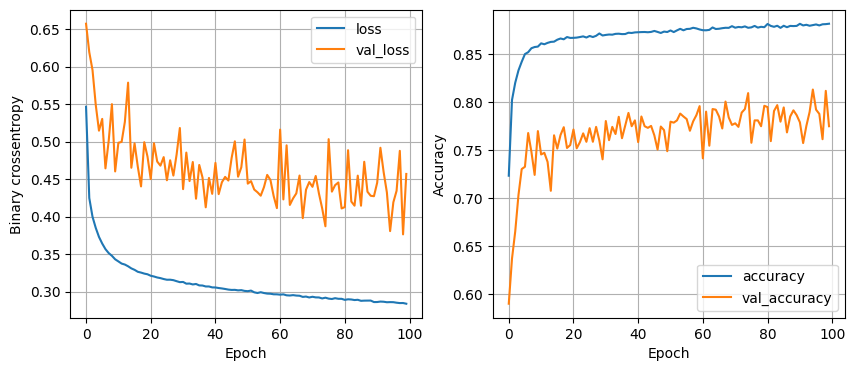

119/119 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.01, batch_size 32


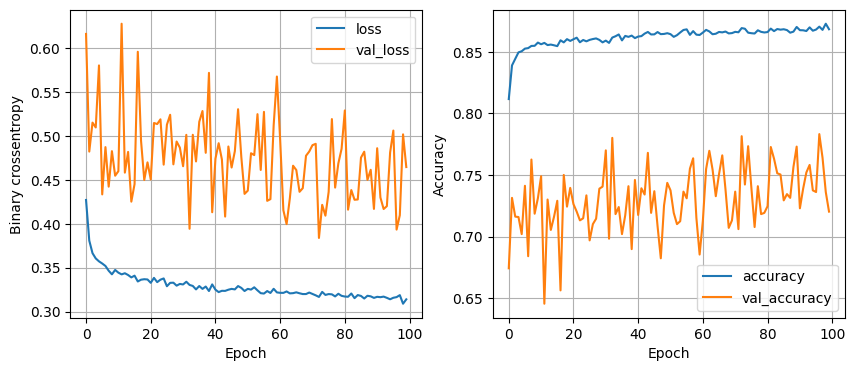

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.01, batch_size 64


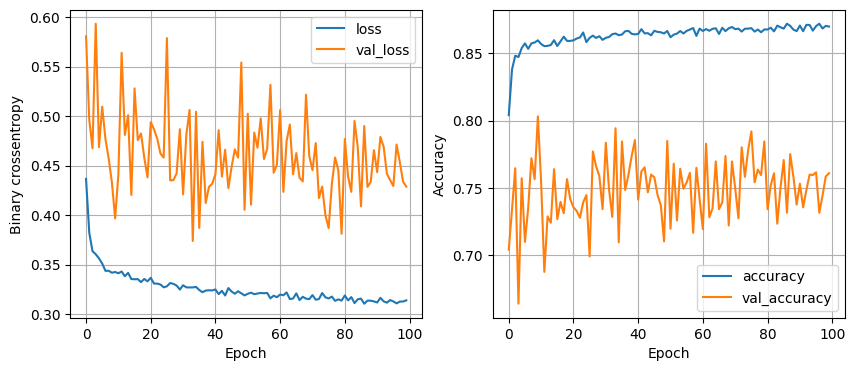

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.01, batch_size 128


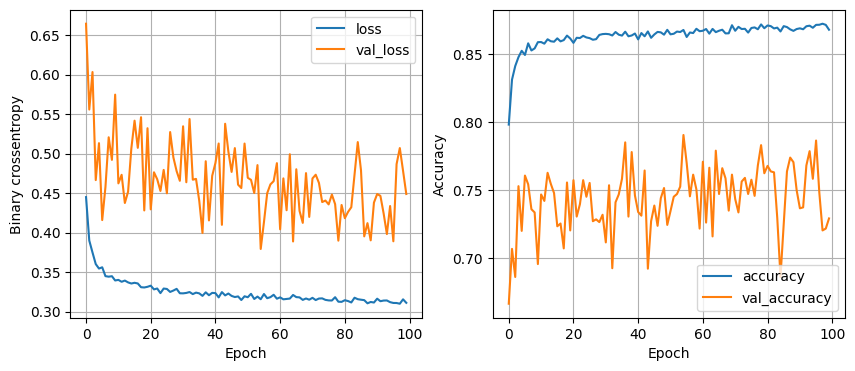

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch_size 32


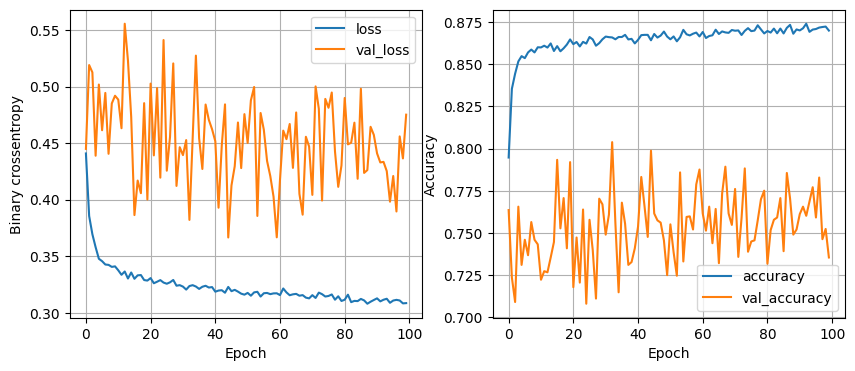

119/119 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch_size 64


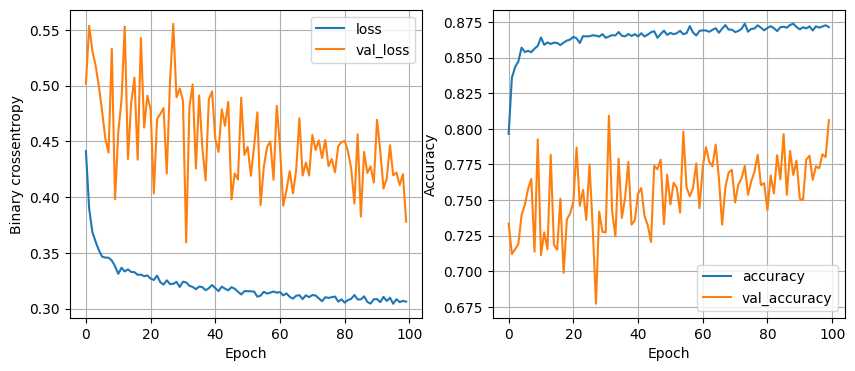

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.005, batch_size 128


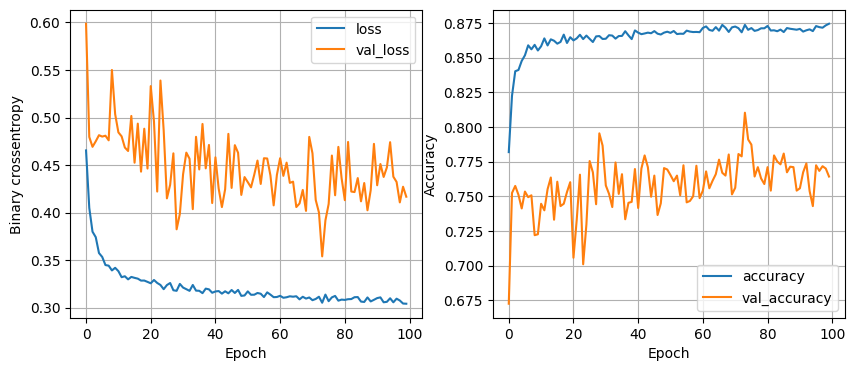

119/119 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.001, batch_size 32


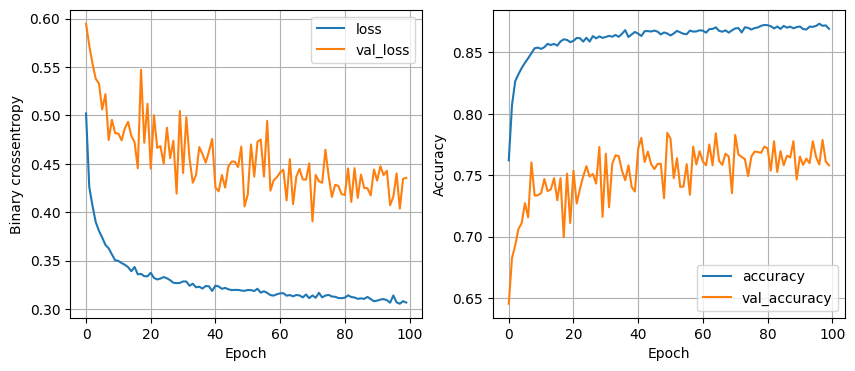

119/119 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch_size 64


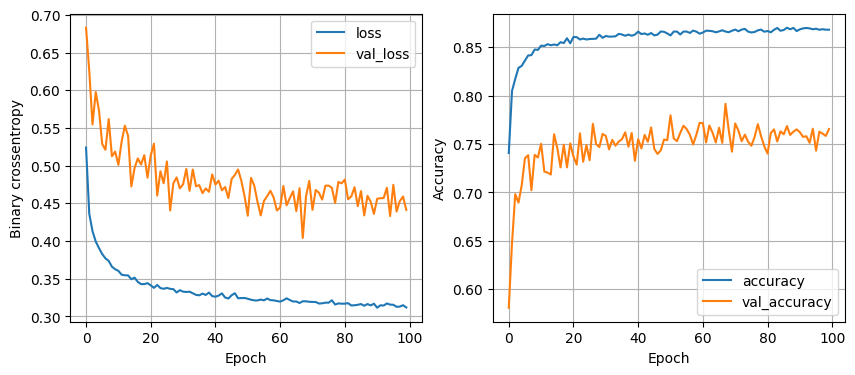

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.001, batch_size 128


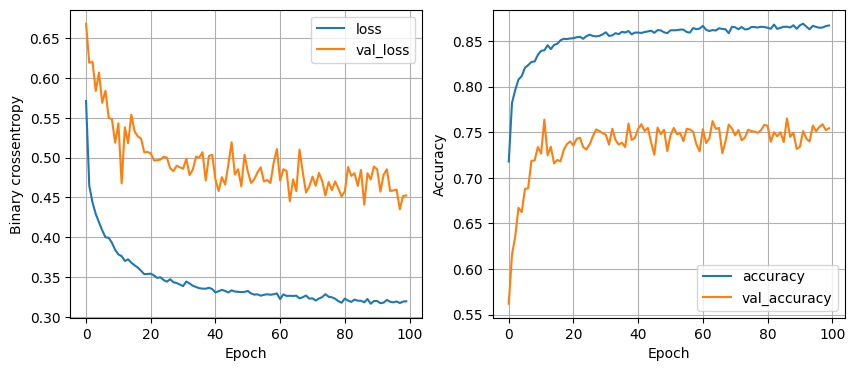

119/119 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8696
64 nodes, dropout 0, lr 0.01, batch_size 32


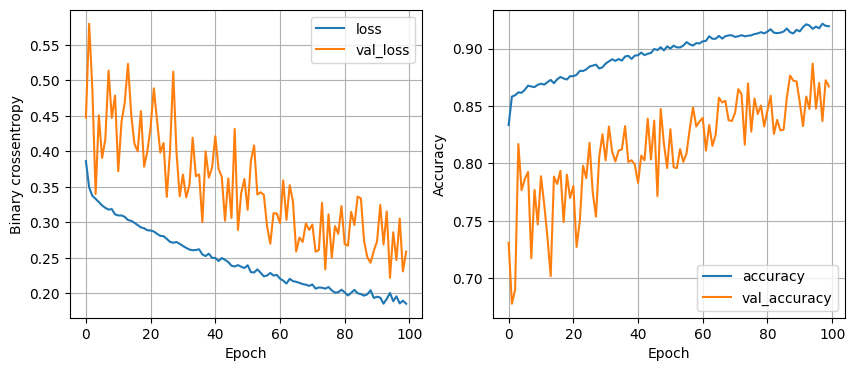

119/119 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.01, batch_size 64


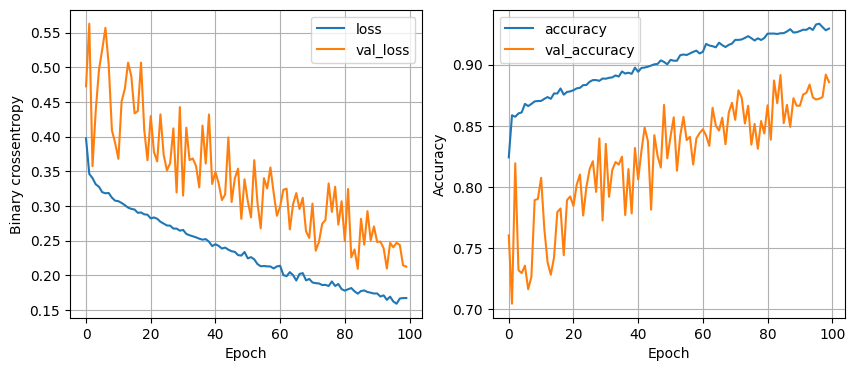

119/119 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.8549
64 nodes, dropout 0, lr 0.01, batch_size 128


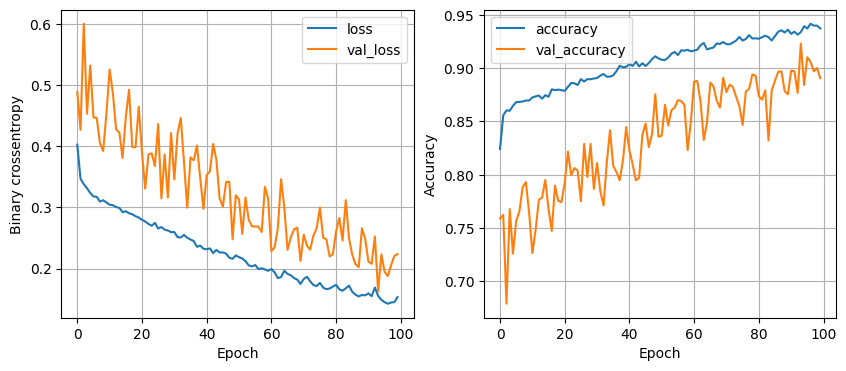

119/119 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.005, batch_size 32


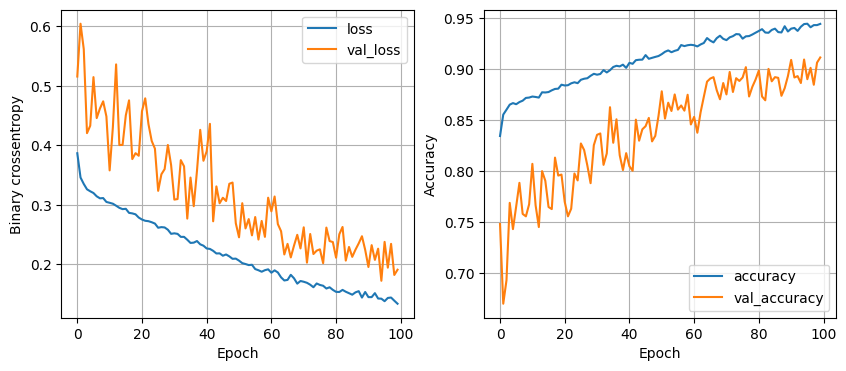

119/119 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.8483
64 nodes, dropout 0, lr 0.005, batch_size 64


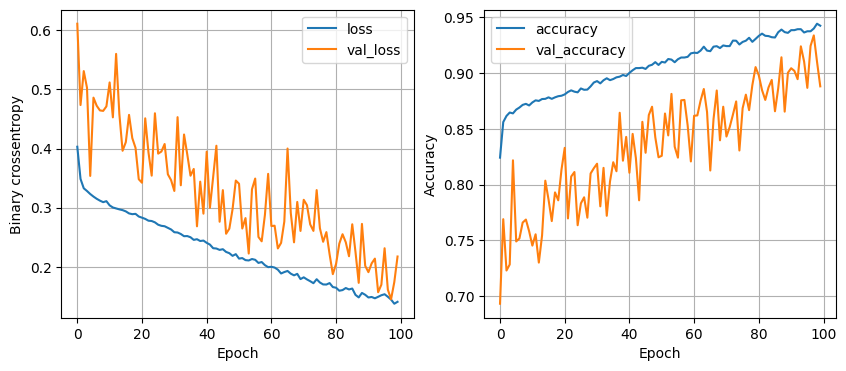

119/119 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.8528
64 nodes, dropout 0, lr 0.005, batch_size 128


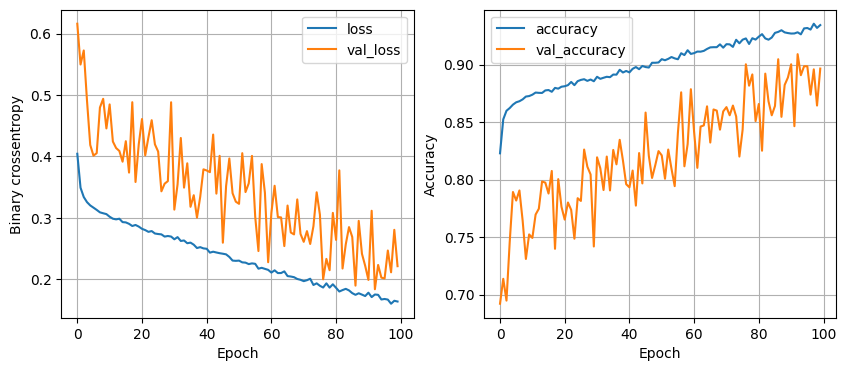

119/119 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.001, batch_size 32


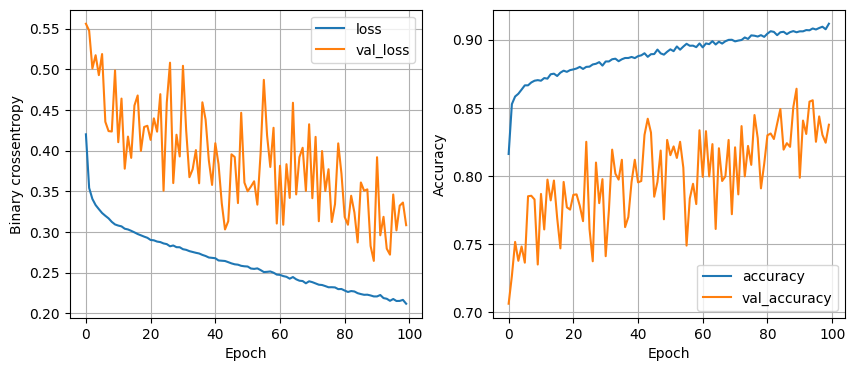

119/119 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.001, batch_size 64


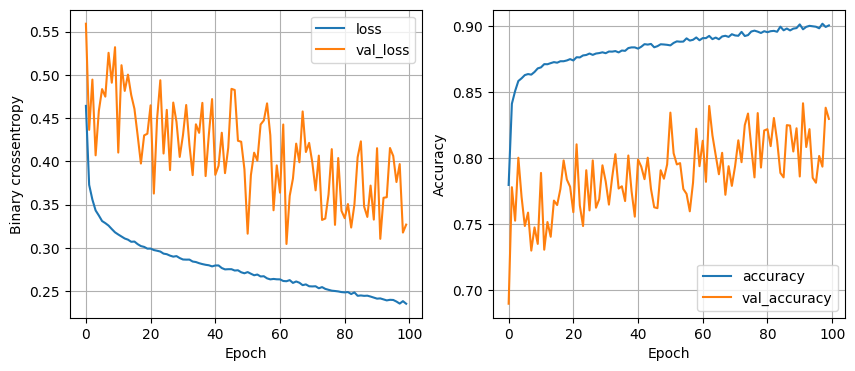

119/119 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8599
64 nodes, dropout 0, lr 0.001, batch_size 128


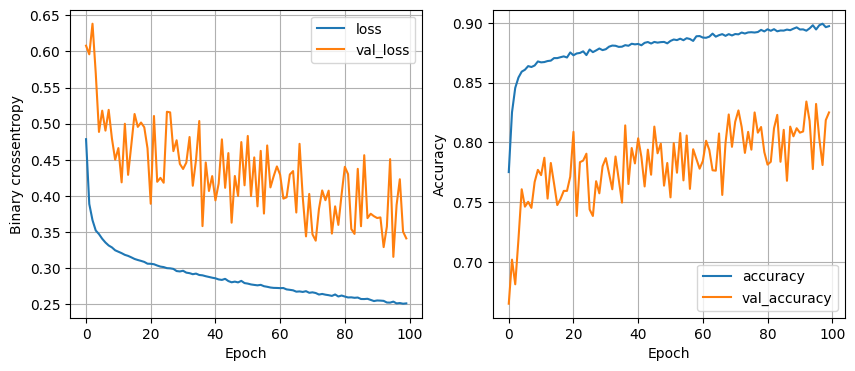

119/119 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8675
64 nodes, dropout 0.2, lr 0.01, batch_size 32


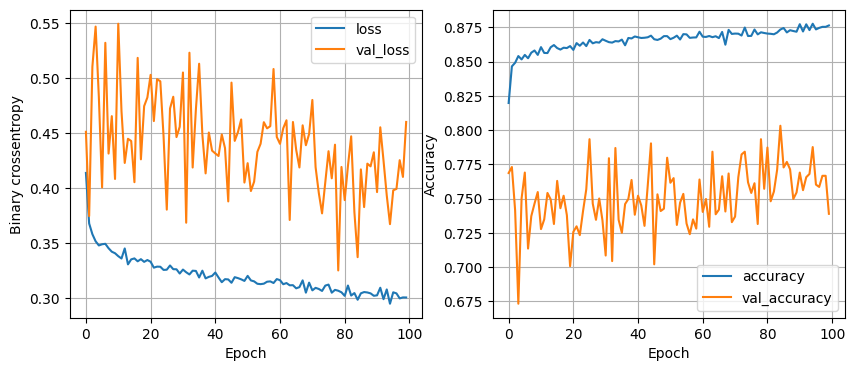

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.01, batch_size 64


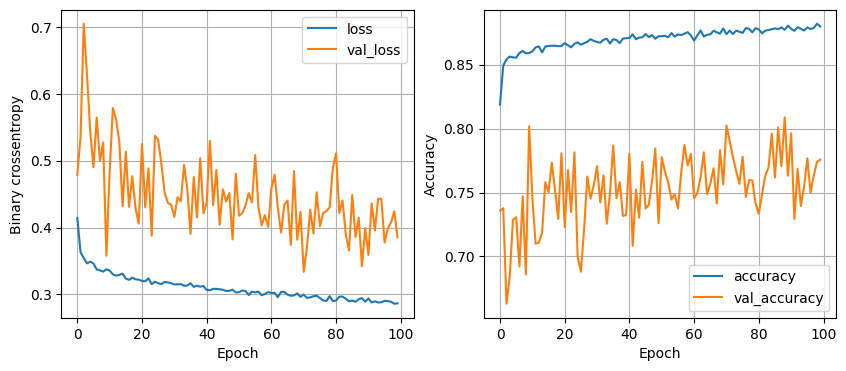

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.01, batch_size 128


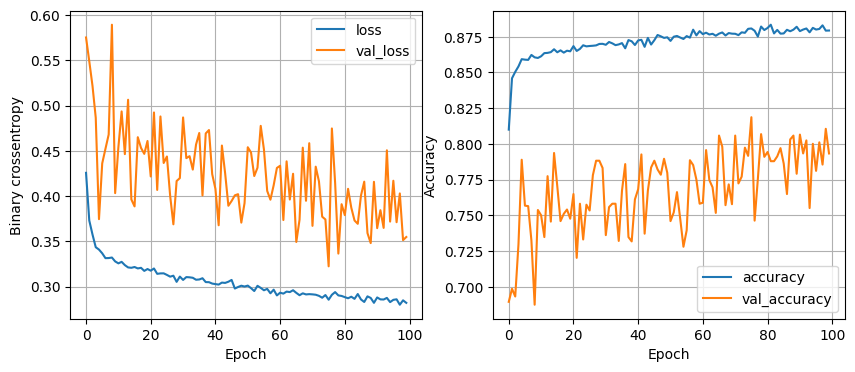

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.005, batch_size 32


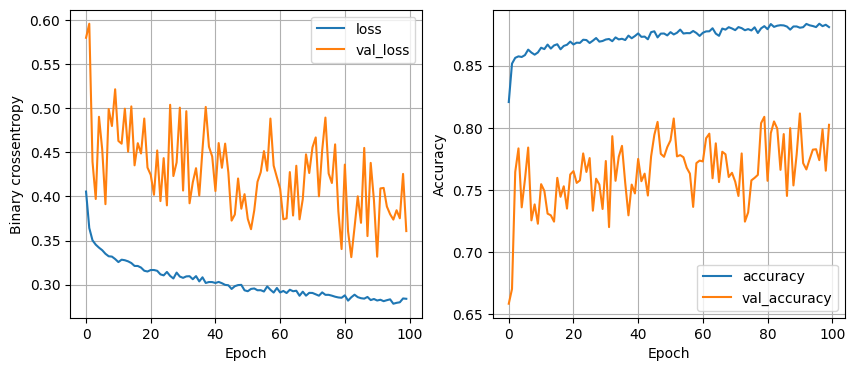

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.005, batch_size 64


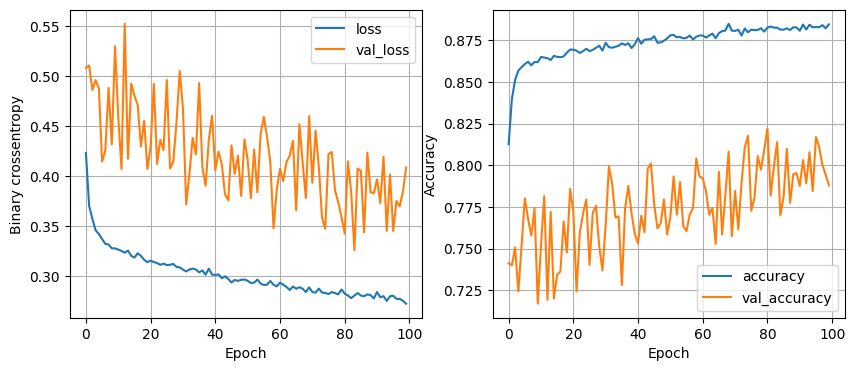

119/119 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8812
64 nodes, dropout 0.2, lr 0.005, batch_size 128


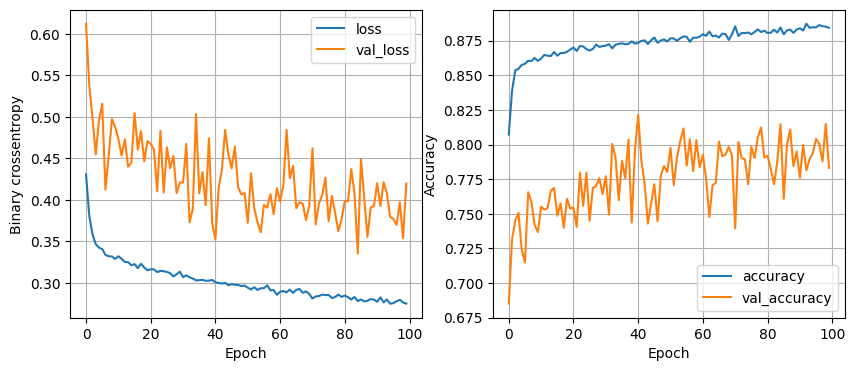

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.001, batch_size 32


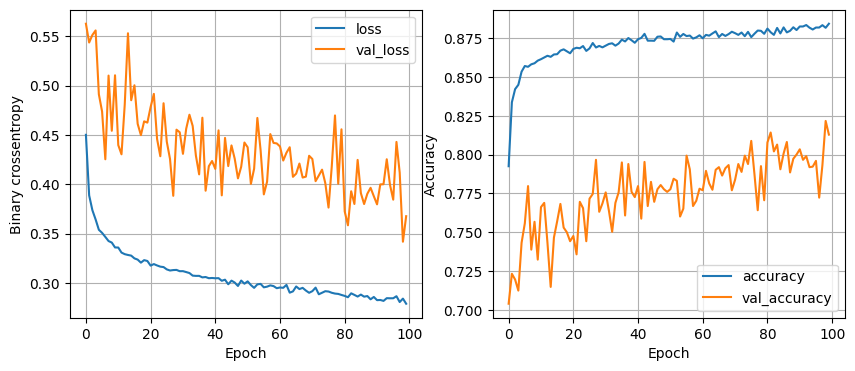

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.001, batch_size 64


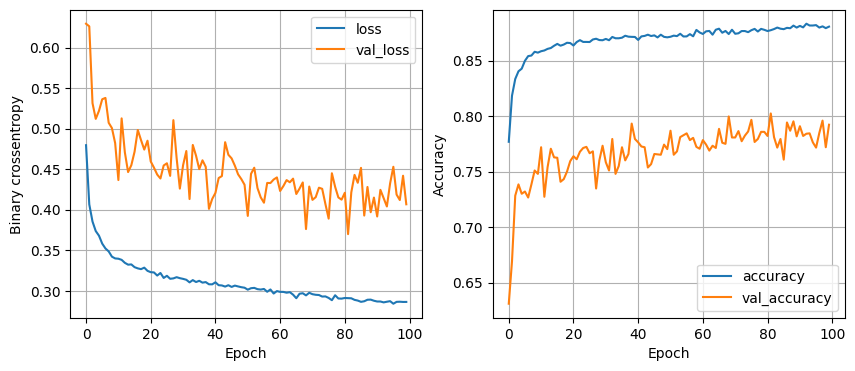

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.001, batch_size 128


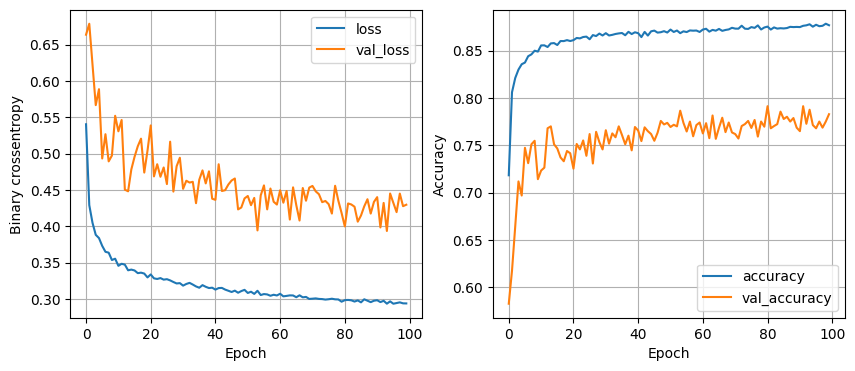

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8754


In [ ]:
#The for loop at the end iterates over various hyperparameters: number of nodes in the hidden layers, dropout probability, learning rate, 
# and batch size. For each combination of hyperparameters, a model is trained and its validation loss is computed. 
# If the validation loss is lower than the previous best, the model and its validation loss are stored. 

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

# The code first uses the trained neural network model (least_loss_model) to predict class probabilities for the test data (x_test). 
# It then converts these probabilities into binary class labels (0 or 1), based on whether the probability is less than or greater than 0.5.
#  The final result is a 1D array of class labels.

119/119 [==============================] - 0s 2ms/step


In [ ]:
y_pred


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1319
           1       0.88      0.94      0.91      2485

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804





---


# **Discussion**


---



From the classification reports, it is clear that different models performed with varying degrees of effectiveness in classifying the two classes, 0 and 1. In terms of accuracy, the Support Vector Machine (SVM), Neural Network, and the Edited Neural Network models achieved the highest accuracy rates, all above 86%.

The K-Nearest Neighbors (KNN) model achieved an accuracy of 83%. While this is relatively high, it's slightly lower than the aforementioned models. The precision, recall, and F1-score also indicate a good performance, although improvements could be made especially in classifying class 0. One possible suggestion for improvement would be tuning the hyperparameters, such as the number of neighbors.

The Naive Bayes model underperformed in comparison to the other models with an accuracy rate of 73%. Its relatively low precision and recall scores, especially for class 0, suggest that it had difficulties correctly classifying this class. For Naive Bayes, feature selection or engineering might be a path to explore for performance improvement.

The SVM model showed an impressive performance with an accuracy rate of 86%, supported by high precision, recall, and F1-scores. However, the method could be further improved by exploring different kernels and tuning parameters such as C and gamma.

The Logistic Regression model's performance was moderate with an accuracy of 78%. The precision, recall, and F1-score for class 0 were lower than those for class 1, indicating that the model had more difficulty correctly predicting class 0. Possible improvements could be made through techniques like regularization(dropout. L1, L2).

The Neural Network and the Edited Neural Network models both displayed strong performance with identical accuracy rates of 87%. However, a more detailed look into the performance metrics reveals a nuanced picture.

The Neural Network model, while having high precision, recall, and F1-scores for both classes, shows slightly lower recall for class 0. This suggests that the model had a slight struggle in correctly identifying this class. This model, while robust, might be improved upon with hyperparameter tuning such as adjusting the learning rate or number of hidden layers.

On the other hand, the Edited Neural Network model exhibits slight but notable improvements in certain areas over the Neural Network model. It achieved higher recall for class 0, indicating that this model was better at correctly identifying instances of this class. This subtle improvement underscores the effectiveness of the modifications made in the edited version, contributing to a more balanced performance across the two classes.

Furthermore, the Edited Neural Network model maintained high precision, pointing to its ability to minimize false positives. This shows the model's capability in not only correctly identifying instances of each class but also limiting misclassification, a critical aspect in many real-world applications where the cost of false positives can be high.

In conclusion, while all models had their respective strengths and weaknesses, the Edited Neural Network model emerged as one of the most effective models overall. It was able to balance both recall and precision effectively and could serve as a strong baseline model for similar tasks. Future work could further refine this model through more advanced techniques, such as different network architectures or advanced optimization algorithms. The potential of ensemble methods, combining the strengths of multiple models, should also be explored to further increase accuracy.



---


# **Conclusion**


---



The purpose of this research was to compare the performance of 5 different machine learning models - K-Nearest Neighbors (KNN), Naive Bayes, Support Vector Machines (SVM), Logistic Regression, Neural Network, and an Edited Neural Network - in classifying a binary target variable. Each model was evaluated based on precision, recall, and F1-score for both classes, as well as overall accuracy.

The results showed that SVM, Neural Network, and the Edited Neural Network models outperformed the rest with an accuracy of 86%, 87%, and 87% respectively. Among these, the Edited Neural Network model displayed a nuanced improvement, particularly in its ability to correctly identify instances of class 0, as evidenced by its higher recall for this class. This suggests that the alterations made to the original Neural Network model were effective and resulted in a more balanced performance across the two classes.

In terms of precision, which is a measure of the model's ability to minimize false positives, the Edited Neural Network model also exhibited high scores, demonstrating its ability to limit misclassification. This is a crucial aspect in many practical applications where the implications of false positives can be significant.

In conclusion, the research objectives have been met - this research effectively compared the performance of six different machine learning models and identified that the SVM, Neural Network, and particularly the Edited Neural Network model perform best for this specific binary classification task. This study provides a foundation for future research that could explore more advanced techniques, such as different network architectures, advanced optimization algorithms, or ensemble methods, to further improve the accuracy of these models.